

# QC Merged Data (experiments 29 - 39)

Merge the datasets from the different experiments and QC them to get a combined dataset for downstream analysis.
29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39

To then be added to already merged data for experiments 01, 03, 06, 09, 10, 12, 18, 19, 20, 21, 22, 23, 24, 27, 28, 40, 41, 42, 43, 44, 45.

In [1]:
library(knitr)
knitr::opts_chunk$set(dev = "CairoPNG")
library(tidyverse)
library(viridis)
library(ggthemes, quietly = TRUE)
library(ggbeeswarm)
library(ggridges)
library(cowplot)
library(scater)
library(scran)
library(SingleCellExperiment)
library(DT)
# library(future)
library(pryr)
if (interactive()) {
    rmote::rmote_on(server_dir="/hps/nobackup/hipsci/scratch/singlecell_endodiff/figures/servr")
rmote::rmote_device(width = 900, height = 600)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggthemes’:

    theme_map

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are mas


# Load data

Load the data from the individual experiments that we will merge.



In [2]:
expts <- c("30", "31", "36", "37", "38", "39")
sce_objects <- paste0("sce_expt", expts)
sce_list <- list()
for(ex in expts) {
    rdata_file <- file.path(paste0("../../data_processed/expt", ex),
                            paste0("sceset_expt", ex,
                                   "_salmon_allmeta_allcells.rds"))
    cat("Experiment ", ex, "\n")
    cat("...........", rdata_file, "\n")
    sce_list[[paste0("sce_expt", ex)]] <- readRDS(rdata_file)
}
for(obj in names(sce_list)) {
    rowData(sce_list[[obj]])$gene_strand <- rowData(sce_list[[obj]])$strand
    rowData(sce_list[[obj]])$strand <- NULL
}
for(obj in names(sce_list)) {
    rowData(sce_list[[obj]]) <- rowData(sce_list[[obj]])[, 1:10]
}
colnames_coldata <- list()
for(obj in names(sce_list)) {
    colnames_coldata[[obj]] <- colnames(colData(sce_list[[obj]]))
}
common_coldatanames <- Reduce(intersect, colnames_coldata)
for(obj in names(sce_list)) {
    colData(sce_list[[obj]]) <- colData(sce_list[[obj]])[, common_coldatanames]
}

sce <- do.call("cbind", sce_list)
sce

Experiment  30 
........... ../../data_processed/expt30/sceset_expt30_salmon_allmeta_allcells.rds 
Experiment  31 
........... ../../data_processed/expt31/sceset_expt31_salmon_allmeta_allcells.rds 
Experiment  36 
........... ../../data_processed/expt36/sceset_expt36_salmon_allmeta_allcells.rds 
Experiment  37 
........... ../../data_processed/expt37/sceset_expt37_salmon_allmeta_allcells.rds 
Experiment  38 
........... ../../data_processed/expt38/sceset_expt38_salmon_allmeta_allcells.rds 
Experiment  39 
........... ../../data_processed/expt39/sceset_expt39_salmon_allmeta_allcells.rds 


class: SingleCellExperiment 
dim: 39385 13349 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(13349): 24327_3#1 24327_3#10 ... 25262_8#98 25262_8#99
colData names(118): salmon_version samp_type ... assigned
  donor_short_id
reducedDimNames(0):
spikeNames(0):

In [126]:
# names(colData(sce))

In [3]:
install.packages("pryr")
library(pryr)

Warning message in install.packages("pryr"):
“installation of package ‘pryr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
mem_used()

17.2 GB

In [5]:
rm(sce_list)


Experiments included in this dataset:



In [6]:
unique(sce$experiment)

[1] "expt_30" "expt_31" "expt_36" "expt_37" "expt_38" "expt_39"


Save this object with everything to disk.



In [7]:
ncol(sce[,sce$donor != "unknown"])
ncol(sce)

[1] 10500

[1] 13349

In [7]:
saveRDS(object = sce, file = "../../data_processed/merged/20180601/sce_merged_preqc_29to39.rds")


Given there are such enormous discrepancies in ERCC levels between experiments we will remove the ERCC genes from consideration.



In [11]:
sce <- sce[!grepl("^ERCC", rownames(sce)),]


## Load full dataset



In [132]:
sce <- readRDS("../../data_processed/merged/20180601/sce_merged_preqc_29to39.rds")


Size of `SingleCellExperiment` object in memory:



In [8]:
object_size(sce)

15 GB

In [9]:
sce

class: SingleCellExperiment 
dim: 39385 23709 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(23709): 22607_5#1 22607_5#10 ... 25262_8#98 25262_8#99
colData names(118): salmon_version samp_type ... assigned
  donor_short_id
reducedDimNames(0):
spikeNames(0):


## Define endoderm differentiation genes

We define a set of known pluripotency and endoderm differentiation genes that we want
to retain and focus on in downstream analyses.



In [10]:
pluri_markers <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1",
                   "ENSG00000164362_TERT", "ENSG00000181449_SOX2",
                   "ENSG00000121570_DPPA4")
pluri_markers_select <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1",
                          "ENSG00000181449_SOX2")
mesendo_markers <- c("ENSG00000164458_T", "ENSG00000163508_EOMES",
                     "ENSG00000185155_MIXL1")
defendo_markers <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                     "ENSG00000141448_GATA6", "ENSG00000125798_FOXA2",
                     "ENSG00000164736_SOX17", "ENSG00000133937_GSC",
                     "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
defendo_markers_select <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                            "ENSG00000164736_SOX17",
                            "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
later_markers <- c("ENSG00000152804_HHEX", "ENSG00000170608_FOXA3")
diff_genes <- c(pluri_markers, mesendo_markers, defendo_markers, later_markers)


## Filter out very lowly-expressed genes

We filter out genes with extremely low gene expression values (<100
counts in total across all cells), but retain endoderm differentation
genes regardless, so that we can later track what is going on with
them.

Replace NA HGNC symbol for ERCCs with ERCC name.

The output below shows the nubmer of genes with/without HGNC symbols,
that are/aren't lowly expressed, and that are/aren't duplicated gene
symbols.



In [11]:
rowData(sce)$hgnc_symbol[is.na(rowData(sce)$hgnc_symbol)] <-
             rowData(sce)$feature_id[is.na(rowData(sce)$hgnc_symbol)]
missing_hgnc <- is.na(rowData(sce)$hgnc_symbol) | rowData(sce)$hgnc_symbol == ""
missing_hgnc[is.na(missing_hgnc)] <- TRUE
table(missing_hgnc)
low_genes <- (rowSums(counts(sce)) < 100)
table(low_genes)

missing_hgnc
FALSE  TRUE 
29501  9884 

low_genes
FALSE  TRUE 
36521  2864 

In [12]:
dup_gene <- duplicated(rowData(sce)$hgnc_symbol)
table(dup_gene)

dup_gene
FALSE  TRUE 
26370 13015 


Filter out genes with no HGNC symbol and retain just one gene for each
HGNC symbol. The table below shows the number of retained genes (TRUE)
and filtered genes (FALSE).



In [13]:
keep_gene <- ((rownames(sce) %in% diff_genes) | !(missing_hgnc | low_genes | dup_gene))
table(keep_gene)
#length(grep("^ERCC", rownames(sce)[keep_gene]))
#all(diff_genes %in% rownames(sce)[keep_gene])
sce <- sce[keep_gene,]
sce

keep_gene
FALSE  TRUE 
14168 25217 

class: SingleCellExperiment 
dim: 25217 23709 
metadata(0):
assays(2): tpm counts
rownames(25217): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(23709): 22607_5#1 22607_5#10 ... 25262_8#98 25262_8#99
colData names(118): salmon_version samp_type ... assigned
  donor_short_id
reducedDimNames(0):
spikeNames(0):


This substantially reduces the size of the `SingleCellExperiment`
object in memory.



In [14]:
object_size(sce)

9.61 GB


Merged dataset across all experiments sequenced so far contains data
for ~20,000 cells. These cells need serious QC before use.

We have many missing days for earlier experiments, but most later
experiments have data from all differentiation days.



In [15]:
table(sce$experiment, sce$day)

         
          day0 day1 day2 day3
  expt_29  382  382  384  383
  expt_30  384  378  384  384
  expt_31  384  383  384  384
  expt_32  384  384  768  384
  expt_33  768  384  768  768
  expt_34  384  384  384  382
  expt_35  384  384  383  384
  expt_36  384  384  383  768
  expt_37  384  763  384  760
  expt_38  768  767  768  700
  expt_39  767 1152  768  384



# Calculate QC metrics

We calculate QC metrics, using ERCC and mitochondrial genes as feature
controls and bulk and control wells as cell controls.



In [142]:
# sce$well_type

In [16]:
table(sce$well_type)
sce$well_type[is.na(sce$well_type)] <- "single cell"
sce$well_type[is.na(sce$well_type) &
              sce$well_id %in% c("A01", "P01", "A24", "B24", "C24", "D24",
                                 "E24", "F24")] <- "bulk"
sce$well_type[sce$well_id %in% c("P21", "P22", "P23", "P24")] <- "control"
sce$well_type[sce$well_type == "empty"] <- "control"


       bulk     control single cell 
        443         224       21122 

In [17]:
ercc_genes <- grepl("^ERCC", rownames(sce))
mt_genes <- grepl("^MT-", rowData(sce)$hgnc_symbol)
sce <- calculateQCMetrics(sce,
    feature_controls = list(ERCC = ercc_genes, MT = mt_genes),
    cell_controls = list(bulk = (sce$well_type == "bulk"),
                         control = (sce$well_type == "control")))

In [18]:
saveRDS(object = sce, file = "../../data_processed/merged/20180601/sce_merged_preqc_29to39_with_qc_metrics.rds")

In [ ]:
#sce <- readRDS("../../data_processed/merged/sce_merged_preqc_with_qc_metrics.rds")




# QC plots

## Plots of control wells




Warning message:
“Removed 12 rows containing missing values (geom_point).”

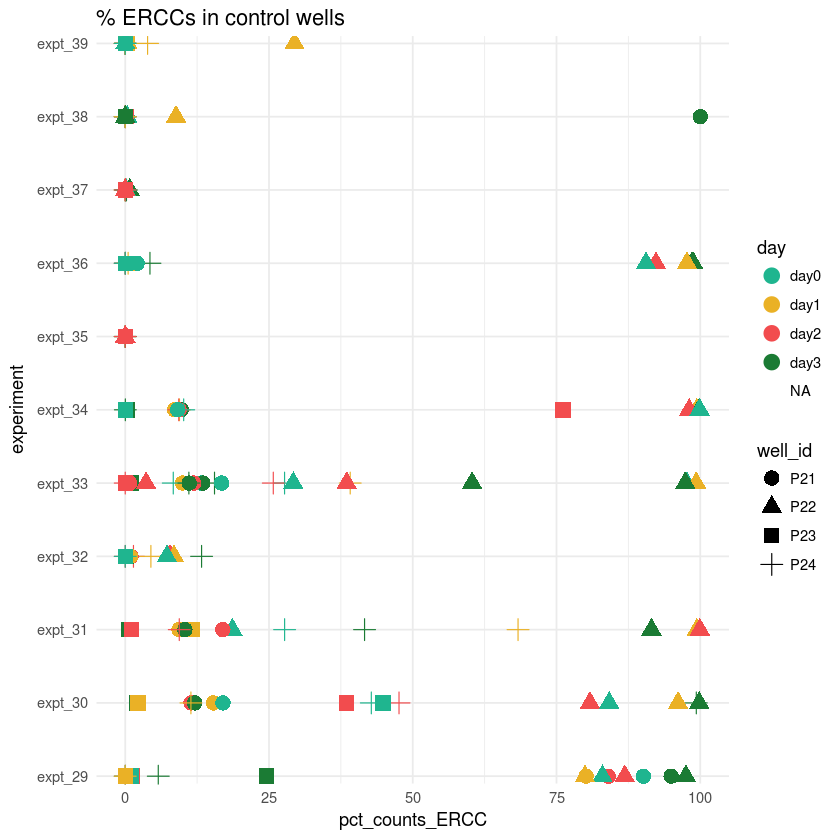

In [19]:
ggplot(as.data.frame(colData(sce)[sce$well_type == "control",]),
       aes(x = pct_counts_ERCC, y = experiment, color = day,
           shape = well_id)) +
    geom_point(size = 4) +
    scale_color_canva(palette = "Tropical tones") +
    ggtitle("% ERCCs in control wells") +
   scale_y_discrete(expand = c(0.01, 0))  + theme_minimal()


P21 and P23 are positive controls; P22 and P24 are negative controls. ERCCs in A1, P21, P22, no ERCCS in P23, P24.



In [20]:
sce$control_type <- NA
sce$control_type[sce$well_id %in% c("P21", "P23")] <- "pos_ctl"
sce$control_type[sce$well_id %in% c("P22", "P24")] <- "neg_ctl"

Warning message:
“Removed 12 rows containing missing values (geom_point).”

Warning message:
“Removed 12 rows containing missing values (geom_point).”

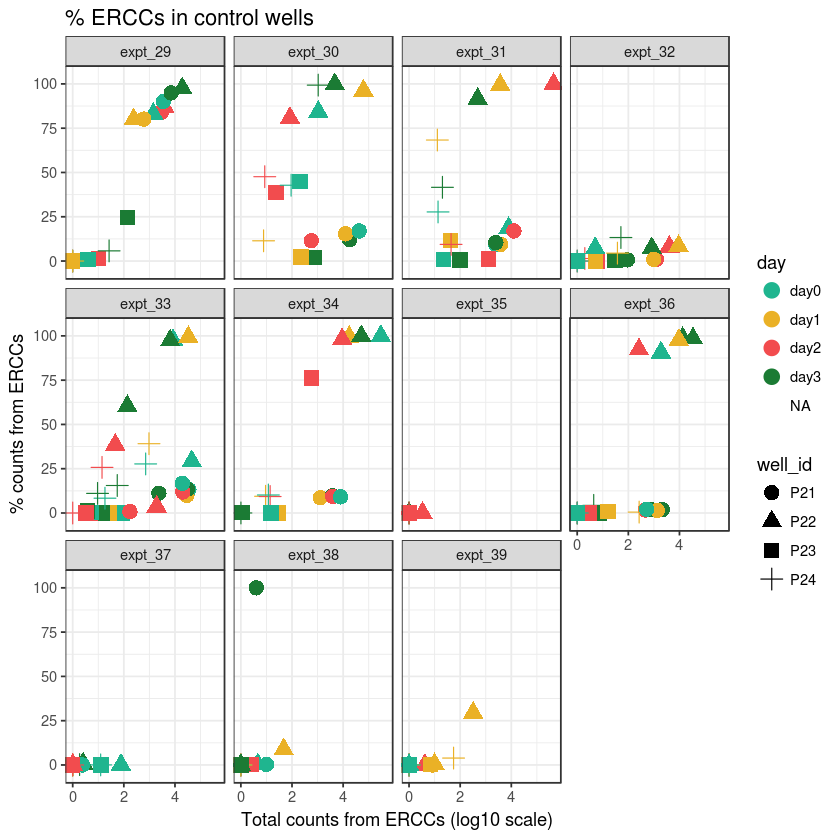

Warning message:
“Removed 12 rows containing missing values (geom_point).”

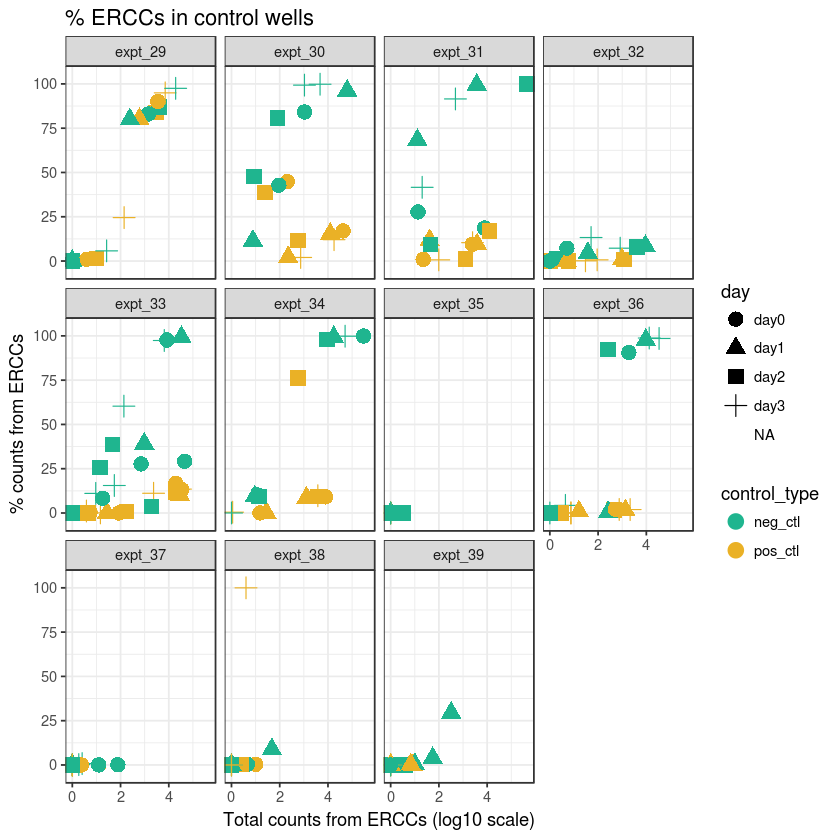

Warning message:
“Removed 12 rows containing missing values (geom_point).”

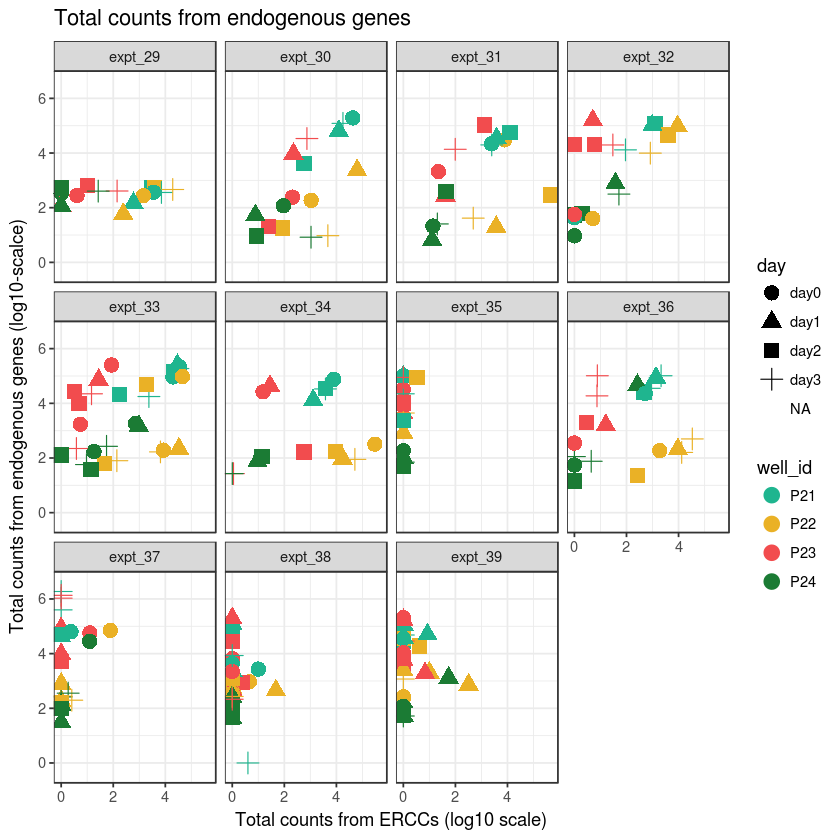

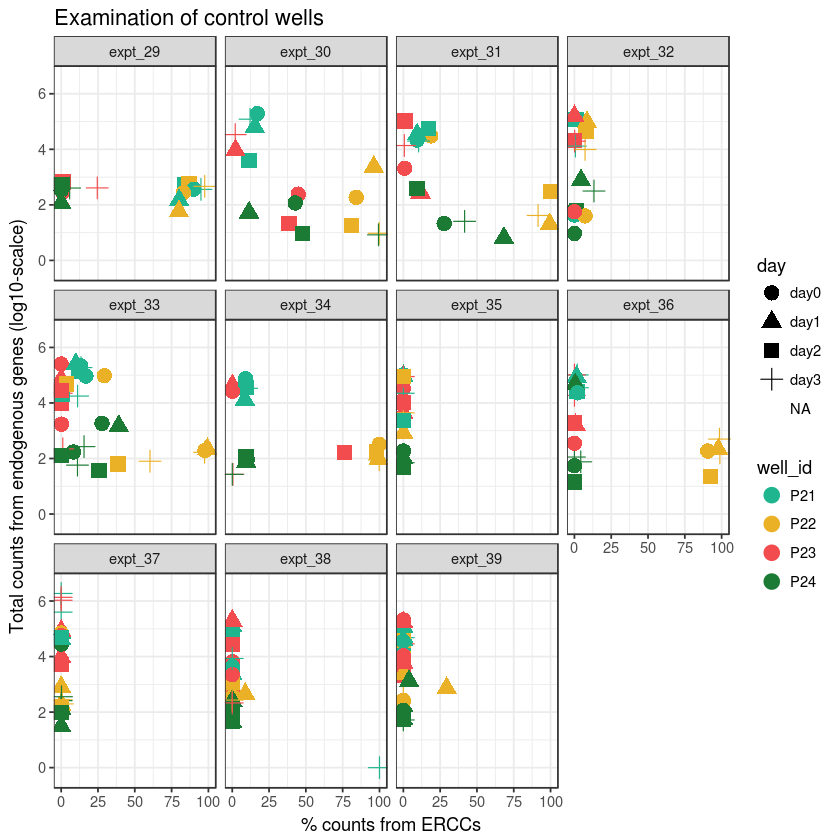

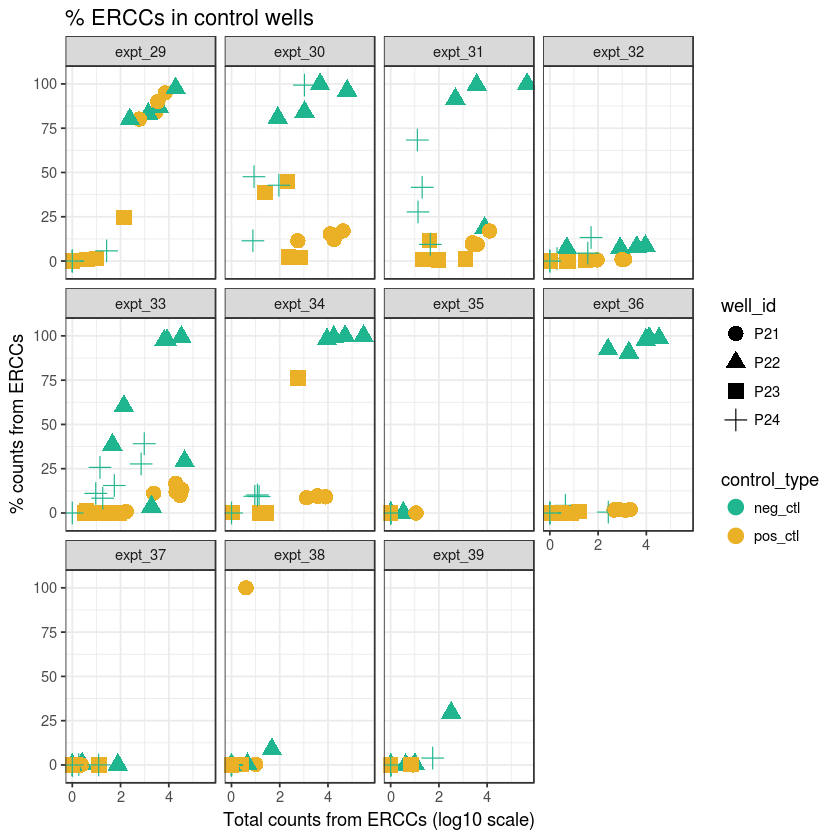

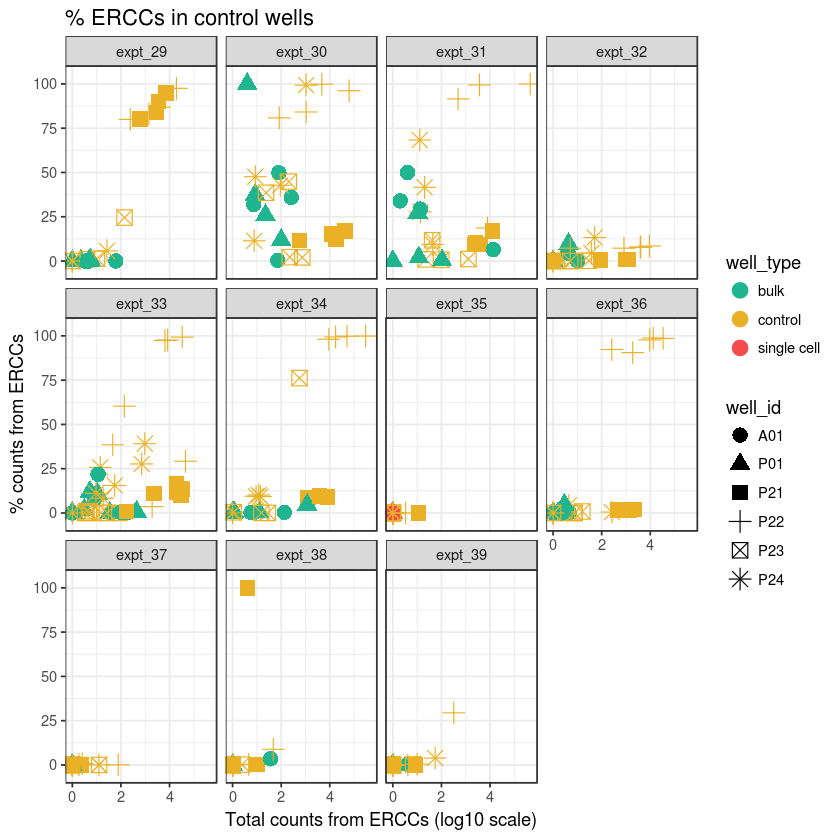

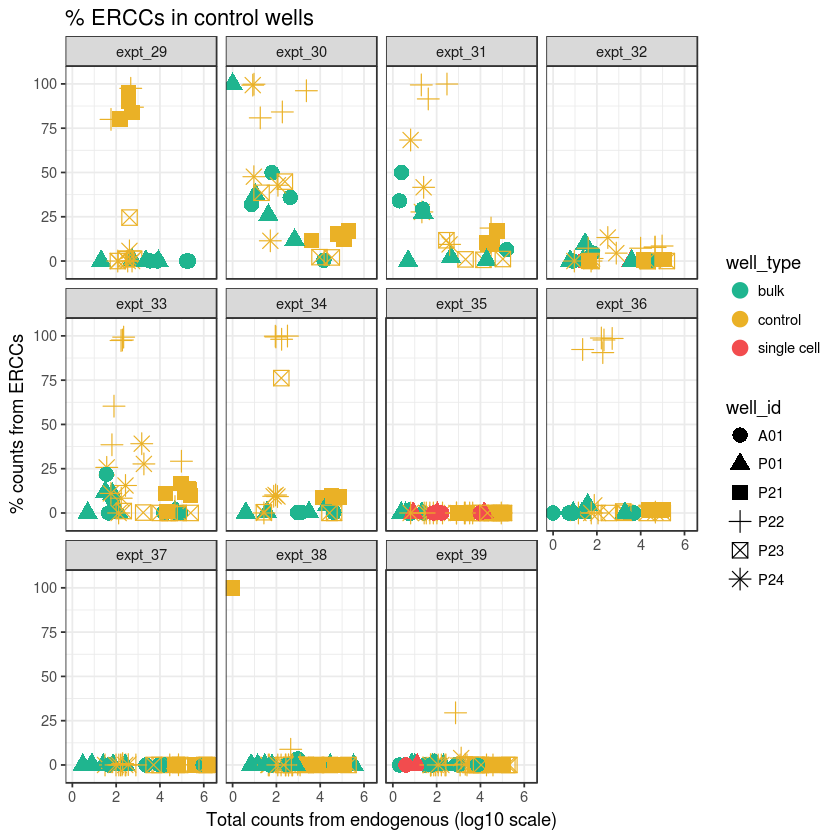

In [21]:
ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC,
           x = log10_total_counts_ERCC, color =  day, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color =  control_type, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = log10_total_counts_endogenous, x = log10_total_counts_ERCC,
           color =  well_id, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("Total counts from endogenous genes (log10-scalce)") +
    xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("Total counts from endogenous genes") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = log10_total_counts_endogenous, x = pct_counts_ERCC,
           color =  well_id, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("Total counts from endogenous genes (log10-scalce)") +
    xlab("% counts from ERCCs") +
    ggtitle("Examination of control wells") +
    scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color =  control_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_id %in% c("A01", "P01", "P21", "P22", "P23", "P24"),],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color = well_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_id %in% c("A01", "P01", "P21", "P22", "P23", "P24"),],
       aes(y = pct_counts_ERCC, x = log10_total_counts_endogenous, color = well_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from endogenous (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()



## Distributions of QC metrics across days



In [22]:
library(RColorBrewer)
col_list = c(brewer.pal(8,"Set1"), brewer.pal(8,"Set2"), brewer.pal(12,"Set3"), brewer.pal(12,"Paired"),
             brewer.pal(9,"Pastel1"), brewer.pal(8,"Pastel2"), brewer.pal(8,"Dark2"), brewer.pal(8,"Accent"))

Picking joint bandwidth of 1.32
Picking joint bandwidth of 1.23
Picking joint bandwidth of 1.41
Picking joint bandwidth of 2.49
Picking joint bandwidth of 1.37


Picking joint bandwidth of 0.173
Picking joint bandwidth of 0.178
Picking joint bandwidth of 0.141
Picking joint bandwidth of 0.275
Picking joint bandwidth of 0.106


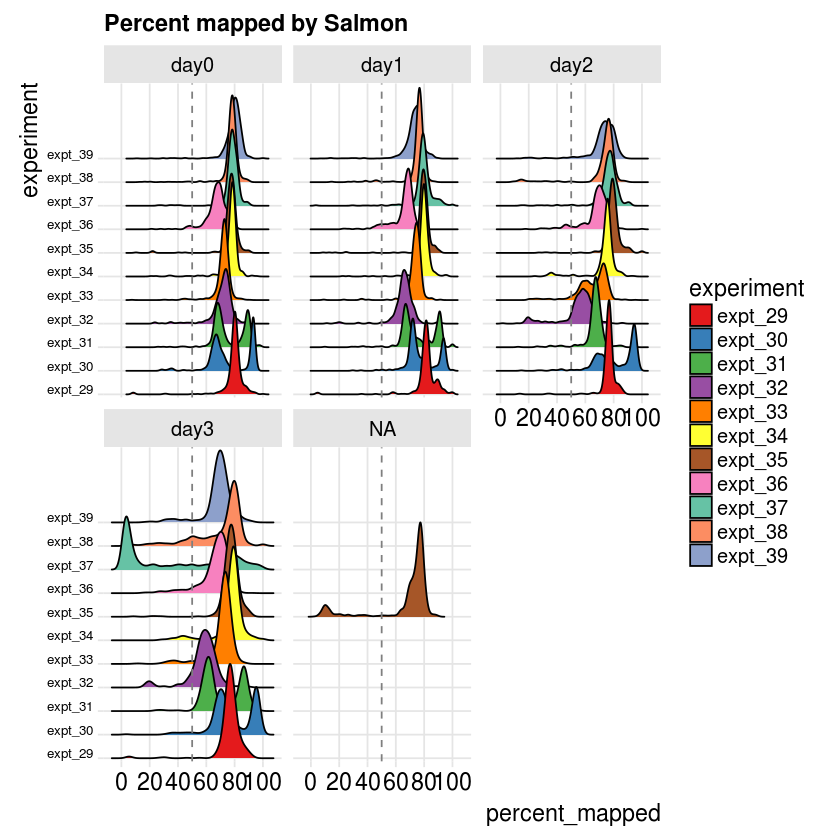

Picking joint bandwidth of 654
Picking joint bandwidth of 587
Picking joint bandwidth of 511
Picking joint bandwidth of 792
Picking joint bandwidth of 493


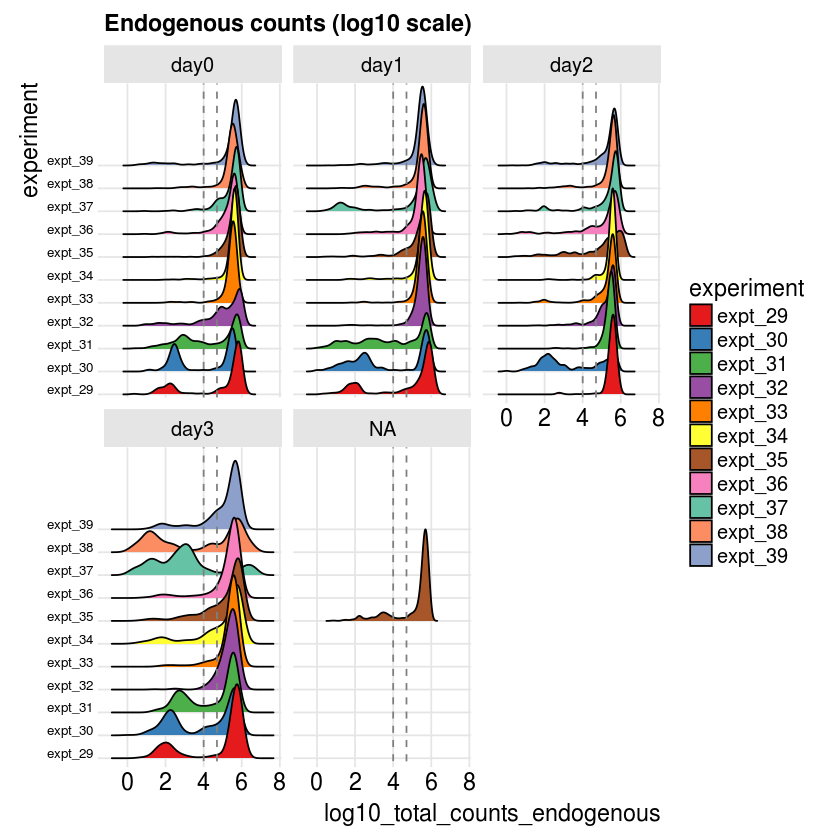

Picking joint bandwidth of 2.29
Picking joint bandwidth of 2.13
Picking joint bandwidth of 1.32
Picking joint bandwidth of 2.55
Picking joint bandwidth of 0.0647


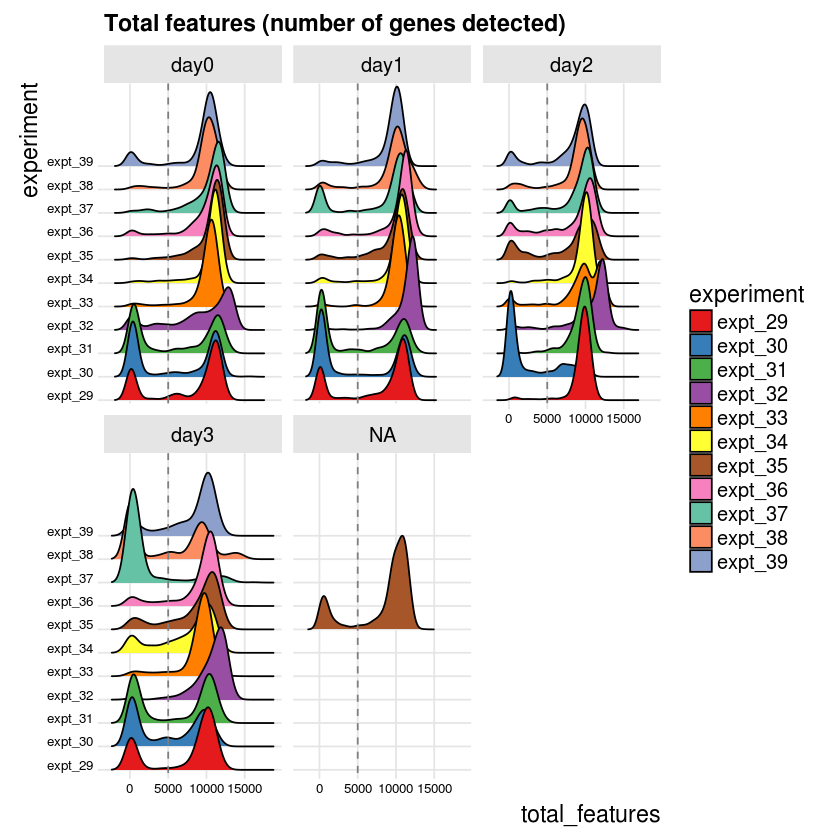

Picking joint bandwidth of 0.159
Picking joint bandwidth of 0.156
Picking joint bandwidth of 0.126
Picking joint bandwidth of 0.15
Picking joint bandwidth of 0.059


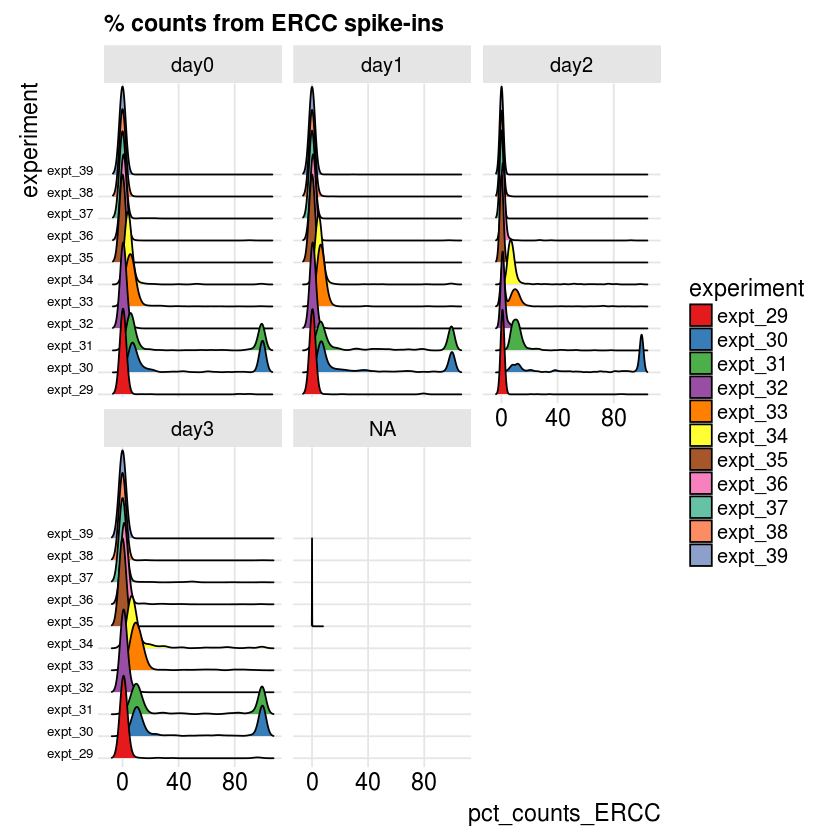

Picking joint bandwidth of 0.717
Picking joint bandwidth of 0.692
Picking joint bandwidth of 0.632
Picking joint bandwidth of 0.74
Picking joint bandwidth of 0.419


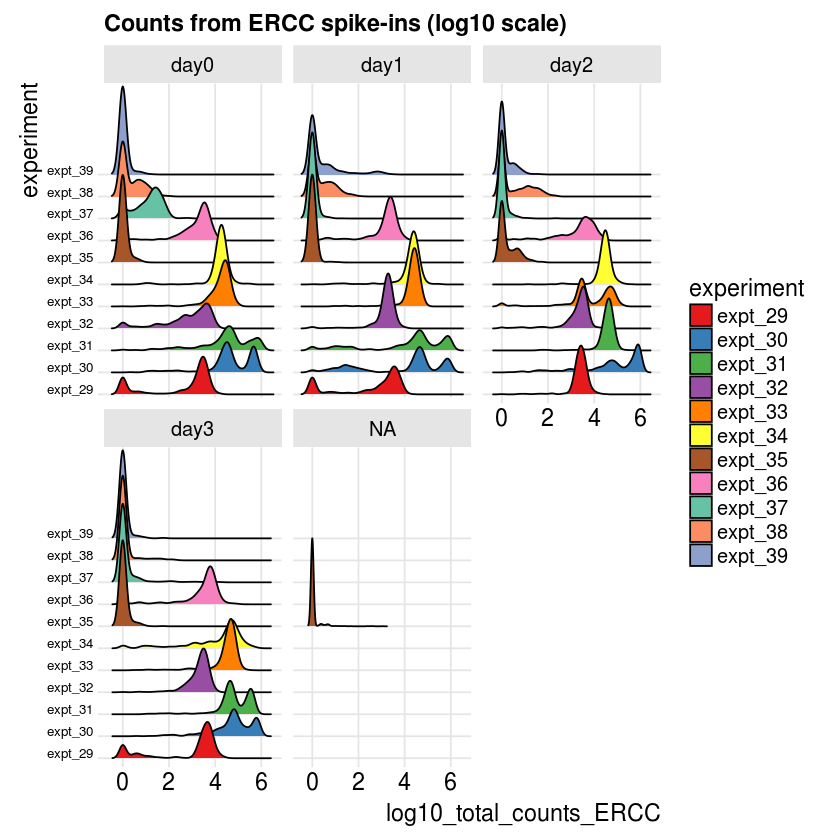

Picking joint bandwidth of 2.47
Picking joint bandwidth of 2.19
Picking joint bandwidth of 1.43
Picking joint bandwidth of 3.5
Picking joint bandwidth of 1.38


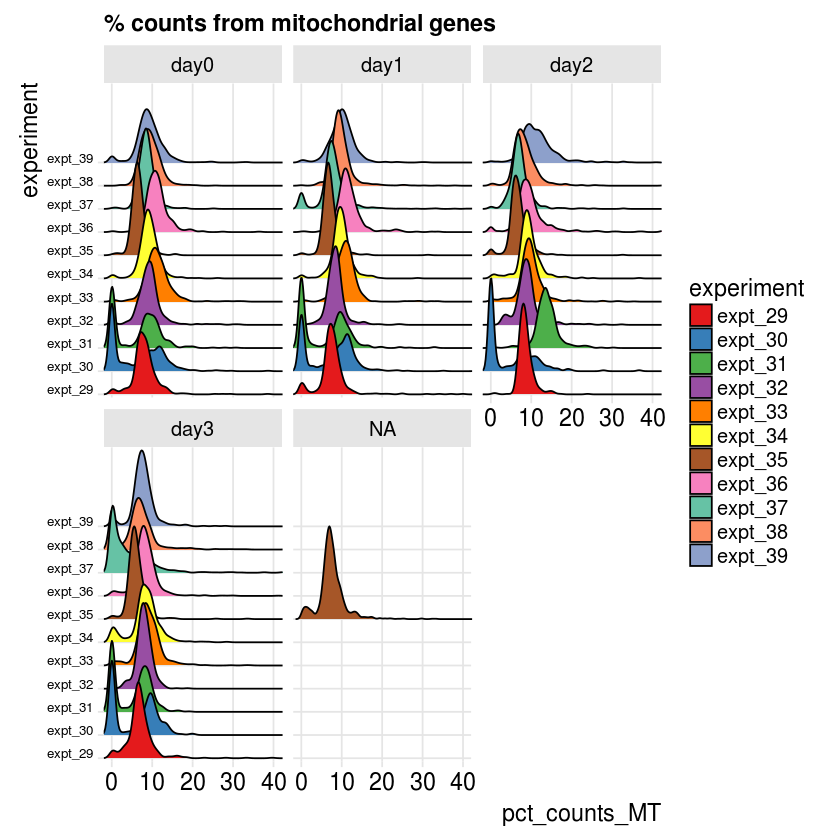

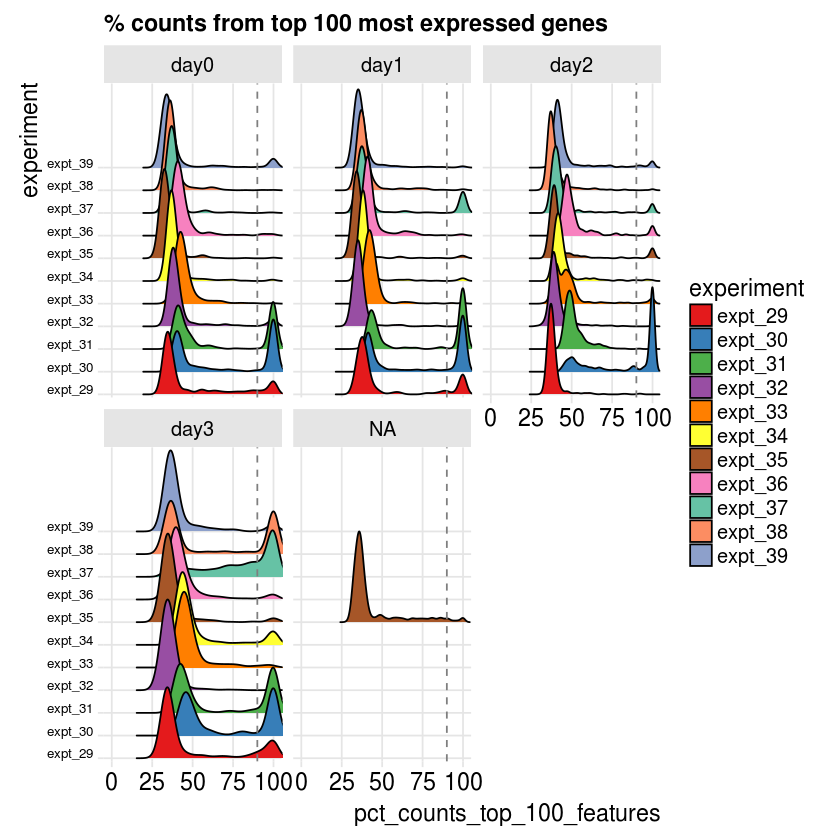

In [23]:
ggplot(as.data.frame(colData(sce)), aes(x = percent_mapped, y = experiment,
                         fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 50, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Percent mapped by Salmon") +
    scale_x_continuous(breaks = c(0, 20, 40, 60, 80, 100)) +
    scale_y_discrete(expand = c(0.01, 0))   + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))

ggplot(as.data.frame(colData(sce)), aes(x = log10_total_counts_endogenous, y = experiment,
                         fill =  experiment)) +
    geom_density_ridges(scale = 4) +
    geom_vline(xintercept = c(4, log10(50000)), linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Endogenous counts (log10 scale)") +
    scale_y_discrete(expand = c(0.01, 0))  +  # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))


ggplot(as.data.frame(colData(sce)), aes(x = total_features, y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 5000, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Total features (number of genes detected)") +
    scale_y_discrete(expand = c(0.01, 0))  +  # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8), axis.text.x = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)),
       aes(x = pct_counts_ERCC, y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from ERCC spike-ins") +
    scale_y_discrete(expand = c(0.01, 0))   + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)), aes(x = log10_total_counts_ERCC,
                                        y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list)  +
    ggtitle("Counts from ERCC spike-ins (log10 scale)" ) +
    scale_y_discrete(expand = c(0.01, 0))  + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)), aes(x = pct_counts_MT,
                                        y = experiment, fill = experiment)) +
    geom_density_ridges(scale = 4) +
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from mitochondrial genes") +
    coord_cartesian(xlim = c(0, 40)) +
    scale_y_discrete(expand = c(0.01, 0)) +   # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))


ggplot(as.data.frame(colData(sce)), aes(x = pct_counts_top_100_features,
                                        y = experiment, fill = experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 90, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from top 100 most expressed genes") +
    coord_cartesian(xlim = c(0, 100)) +
    scale_y_discrete(expand = c(0.01, 0)) +   # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))



## Endogenous counts against total counts



In [24]:
length( unique(sce$experiment))
expt_list <- unique(sce$experiment)

[1] 11

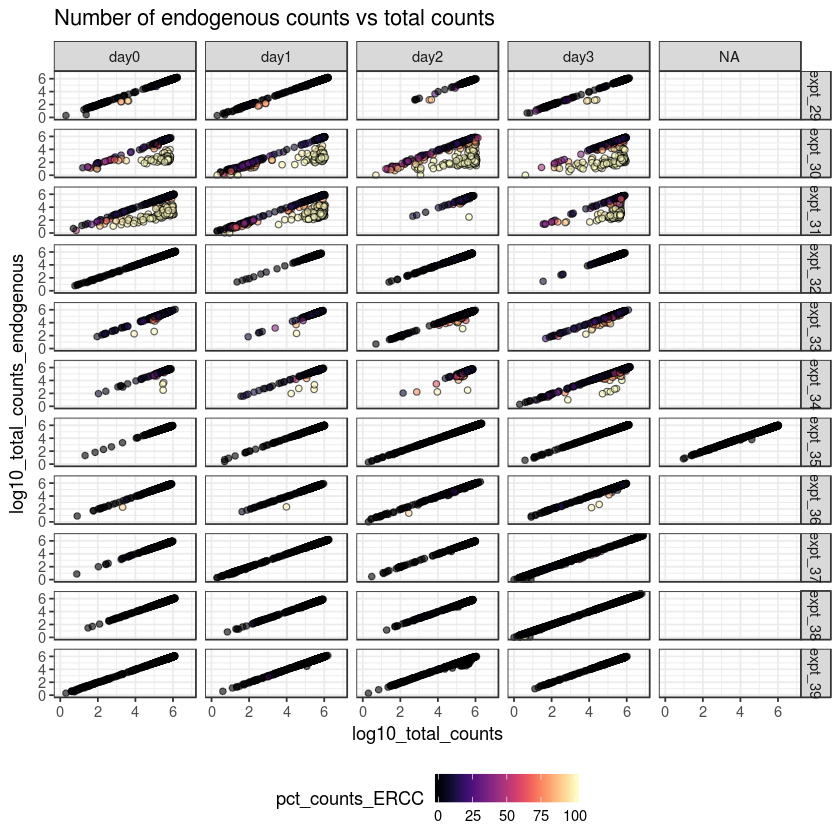

In [25]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts, y = log10_total_counts_endogenous,
           fill =  pct_counts_ERCC)) +
     geom_point(shape = 21, alpha= 0.6) +
     scale_fill_viridis(option = 'magma') +
     facet_grid(experiment ~ day) + ggtitle("Number of endogenous counts vs total counts") +
     theme_bw() + theme(legend.position = "bottom")


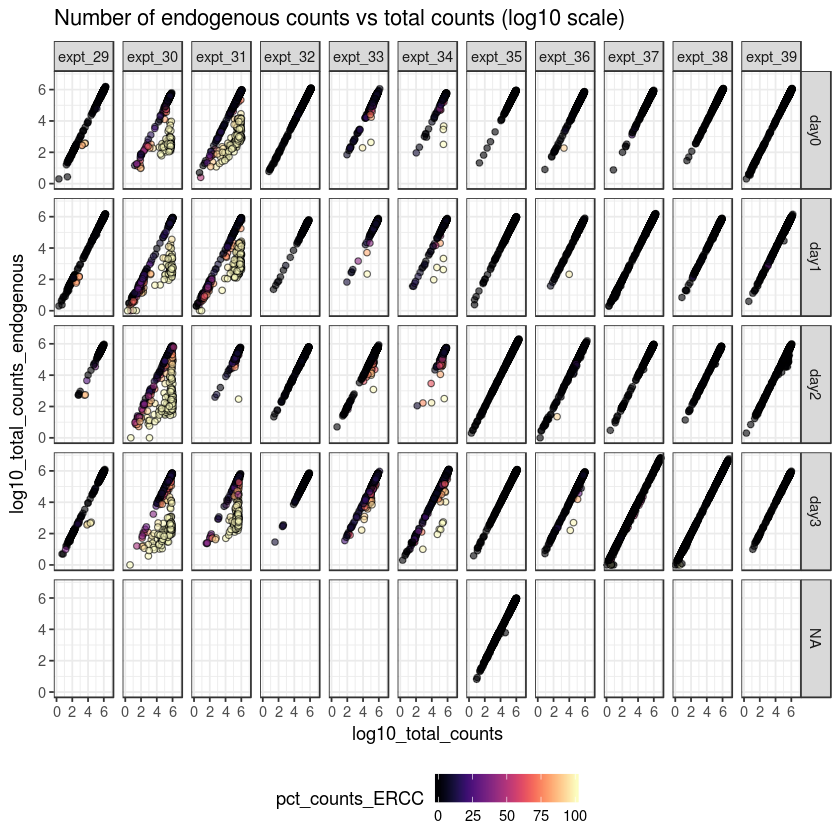

In [26]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts, y = log10_total_counts_endogenous,
           fill =  pct_counts_ERCC)) +
     geom_point(shape = 21, alpha= 0.6) +
     scale_fill_viridis(option = 'magma') +
     facet_grid(day ~ experiment) + ggtitle("Number of endogenous counts vs total counts (log10 scale)") +
     theme_bw() + theme(legend.position = "bottom")


## Percent of reads mapped vs total counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



Warning message:
“Removed 1152 rows containing missing values (geom_point).”

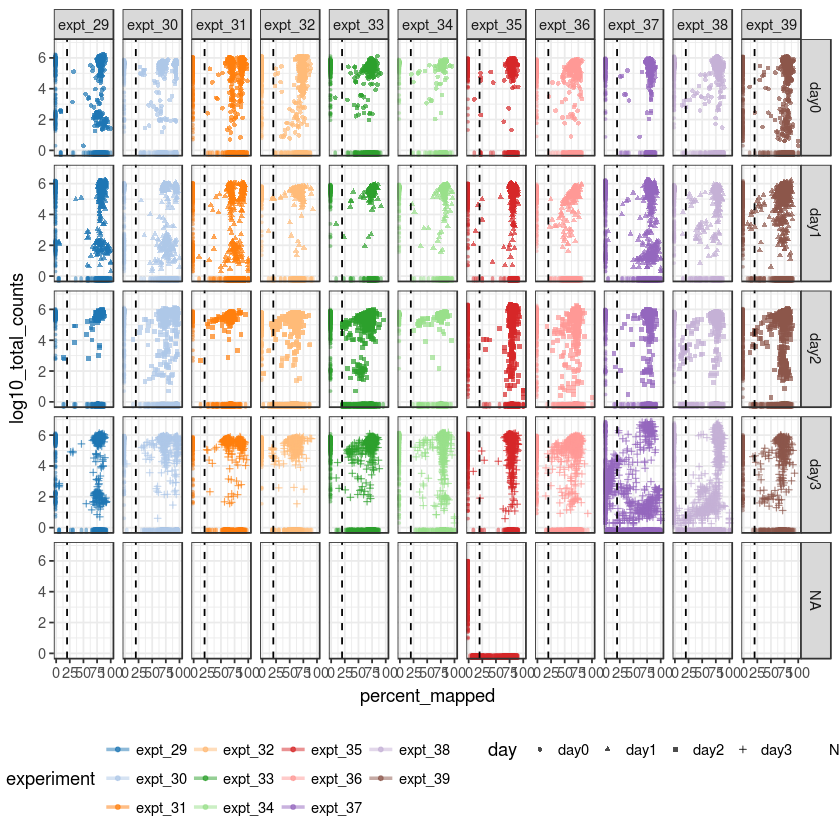

In [27]:
p1 <- plotPhenoData(sce, aes(x = percent_mapped, y = log10_total_counts,
              colour = experiment, shape = day)) +
theme(legend.position = "bottom") +
geom_vline(xintercept = 20, linetype = 2) +
facet_grid(day ~ experiment)
p1 + theme_bw() + theme(legend.position = "bottom")

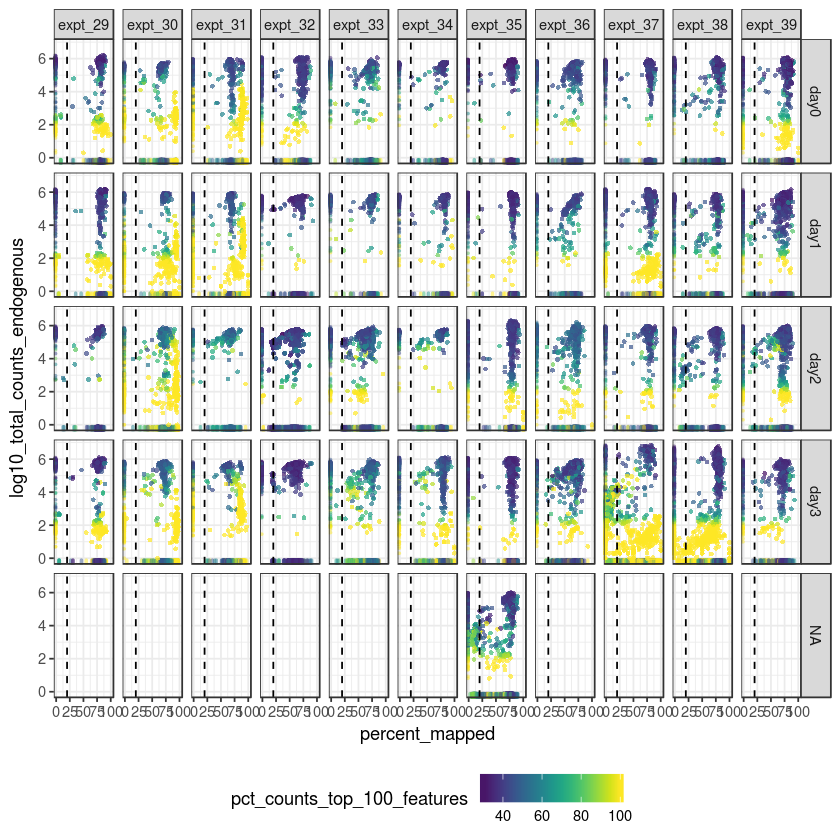

In [28]:
plotPhenoData(sce, aes(x = percent_mapped, y = log10_total_counts_endogenous,
                  colour = pct_counts_top_100_features)) +
    theme(legend.position = "bottom") +
    geom_vline(xintercept = 20, linetype = 2) +
    facet_grid(day ~ experiment) + theme_bw() + theme(legend.position = "bottom")


## Expressed genes vs total counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



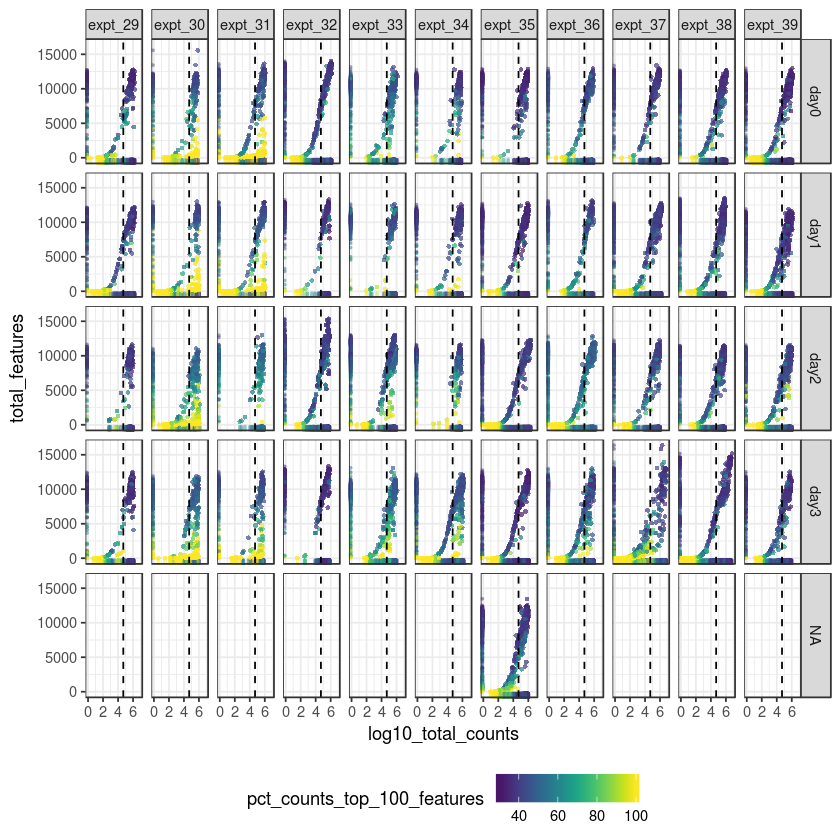

In [29]:
plotPhenoData(sce, aes(x = log10_total_counts, y = total_features,
                  colour =  pct_counts_top_100_features)) +
    facet_grid(day ~ experiment) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() +
    theme(legend.position = "bottom")


## Expressed genes vs endogenous counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



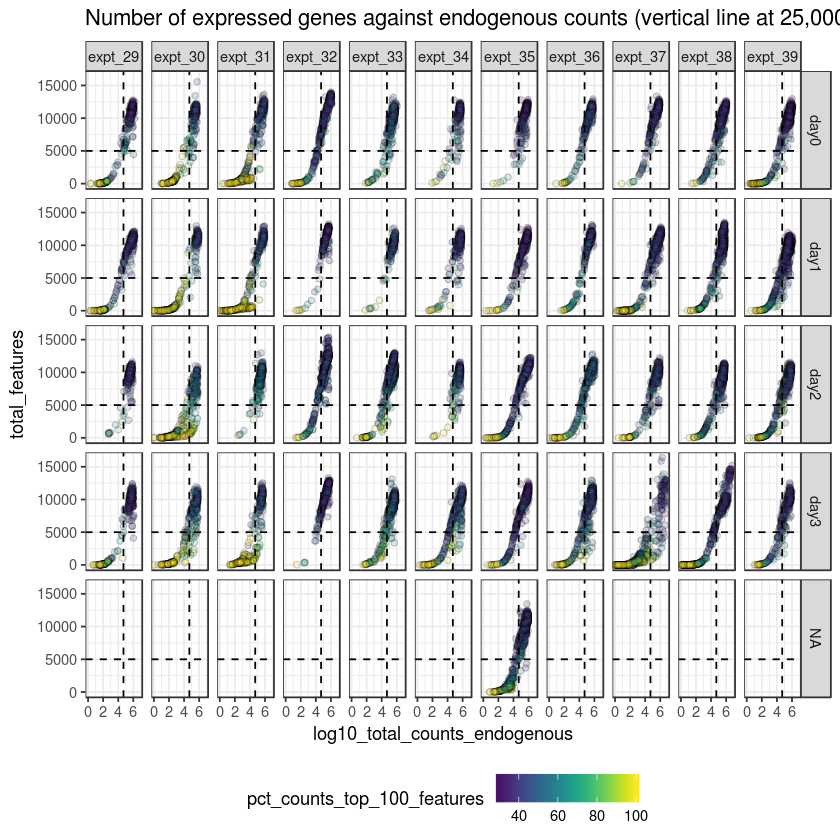

In [30]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
                  fill =  pct_counts_top_100_features)) +
    geom_point(alpha = 0.2, shape = 21) +
    scale_fill_viridis() +
    facet_grid(day ~ experiment) +
    ggtitle("Number of expressed genes against endogenous counts (vertical line at 25,000 endogenous counts)") +
    theme(legend.position = "bottom") +
    geom_hline(yintercept = 5000, linetype = 2) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() + theme(legend.position = "bottom")


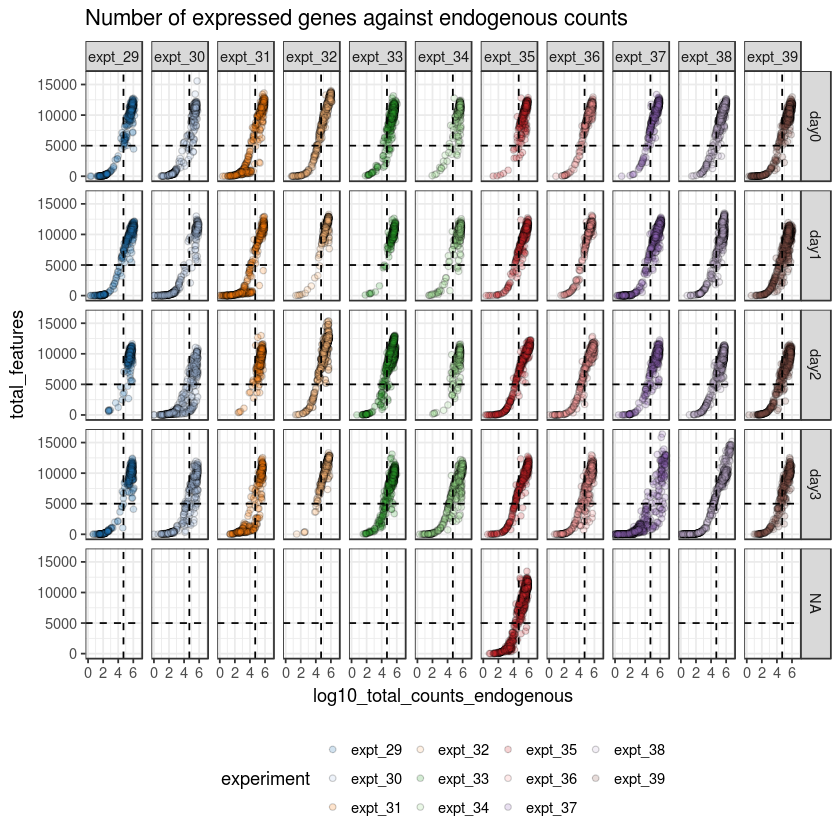

In [31]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  experiment)) +
    geom_point(alpha = 0.2, shape = 21) +
    scale_fill_tableau(palette = "tableau20") +
    facet_grid(day ~ experiment) + ggtitle("Number of expressed genes against endogenous counts") +
    theme(legend.position = "bottom") +
    geom_hline(yintercept = 5000, linetype = 2) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() + theme(legend.position = "bottom")



## Cumulative Expression Plots

The cumulative expression plot (with cells coloured by total number of
genes from endogenous genes) shows a handful of low complexity
libraries and otherwise a range of library complexities associated
with the percentage of expression accounted for by feature controls.



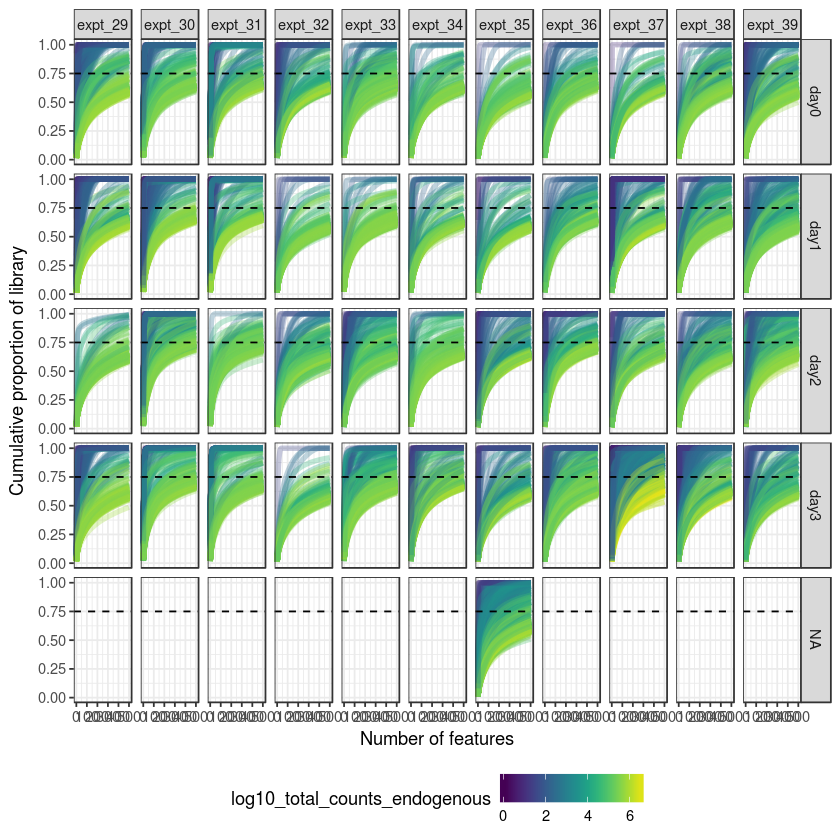

In [32]:
plotScater(sce, exprs_values = "counts", block1 = "experiment", block2 = "day",
           colour_by = "log10_total_counts_endogenous") +
    geom_hline(yintercept = 0.75, linetype = 2) +
    theme_bw() + theme(legend.position = "bottom")


## Most expressed genes

Plot the most expressed genes across each dataset. We have already filtered out ERCC spike-in genes, which have very high expression in the 12 plates from Expt 19, Expt 21 and Expt 22. Many MT and ribosomal genes appear, along with *ACTB* and *GAPDH*, as expected.



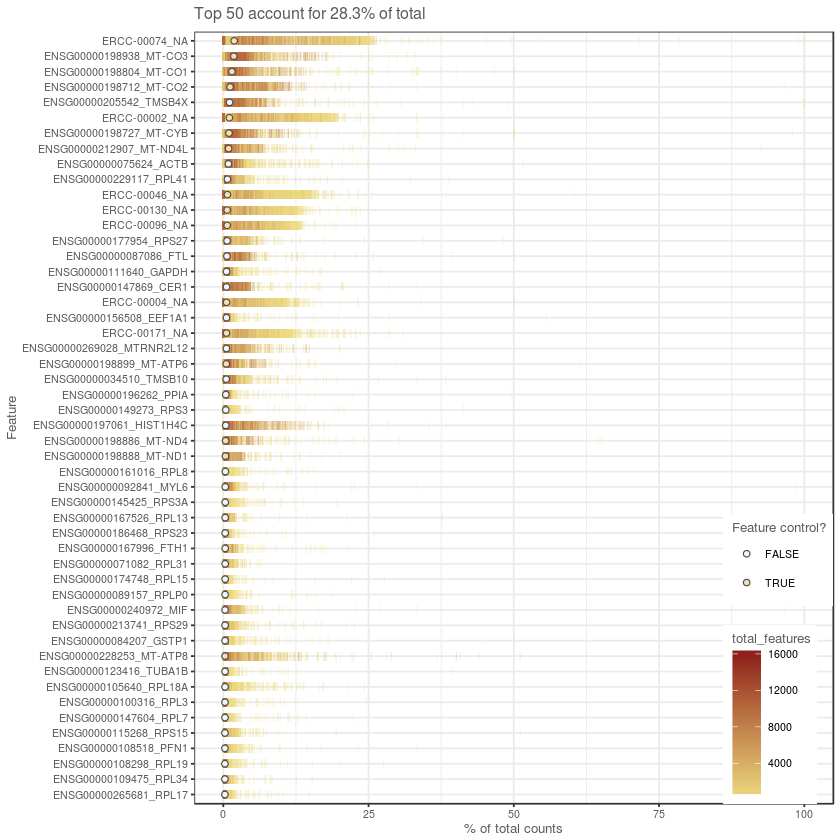

In [33]:
plotQC(sce)


## PCA on QC metrics with outlier detection

Another option available in `scater` is to conduct PCA on a set of QC metrics.
The advantage of doing this is that the QC metrics focus on technical aspects of
the libraries that are likely to distinguish problematics cells. Automatic
outlier detection on PCA plots using QC metrics is available to help identify
potentially problematic cells.

We use the following metrics for PCA-based outlier detection:

* `pct_counts_top_100_features`
* `total_features`
* `pct_counts_feature_controls_MT`
* `pct_counts_feature_controls_ERCC`
* `n_detected_feature_controls`
* `log10_counts_endogenous_features`
* `log10_counts_feature_controls`

A particular set of variables to be used can be specified with the
`selected_variables` argument as shown in the example below.



In [34]:
#names(colData(sce))


In this case, the automatic outlier detection does not successfully identify as outliers those cells that we would want to filter out, so we will not use these outliers in the QC filtering steps below.



The following selected_variables were not found in colData(object): pct_counts_feature_controlsThe following selected_variables were not found in colData(object): total_features_feature_controlsThe following selected_variables were not found in colData(object): log10_total_counts_feature_controls
Other variables from colData(object) can be used by specifying a vector of variable names as the selected_variables argument.
PCA is being conducted using the following variables:pct_counts_top_100_featurestotal_featureslog10_total_counts_endogenous


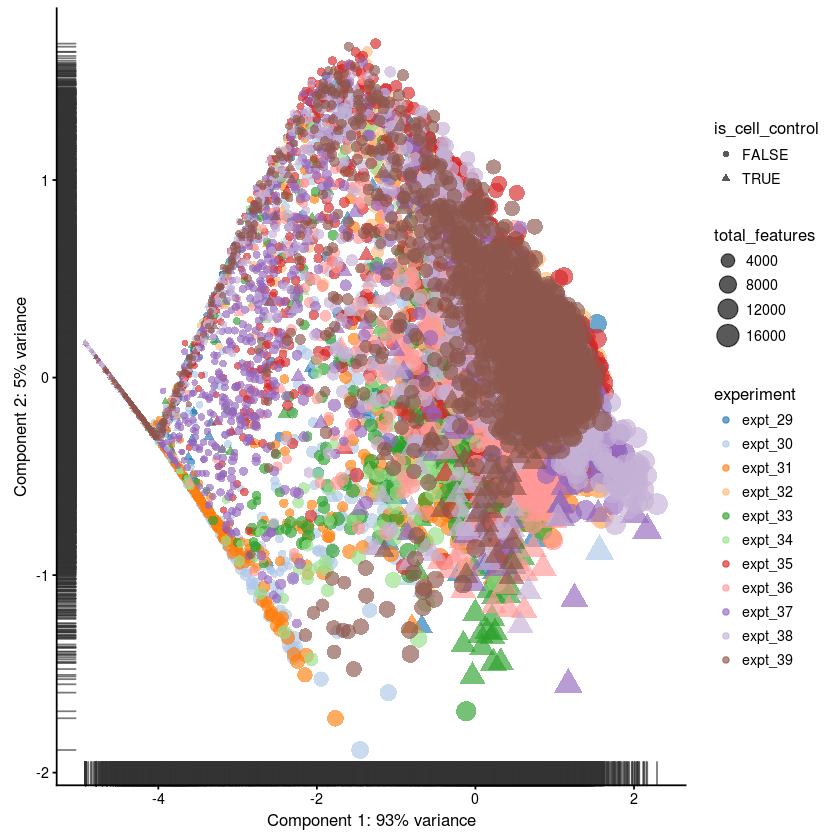

In [35]:
plotPCA(sce, size_by = "total_features", colour_by = "experiment",
        pca_data_input = "pdata", detect_outliers = FALSE)


The cells identified as outliers by the automatic outlier detection method here look like a subset of those that we would like to filter out on the basis of using multiple QC metrics simultaneously.

# Filter cells

Now we will proceed to filtering out potentially problematic cells. We apply the following criteria for filtering:

STRICT:
* total counts from endogenous features > 50,000
* total features > 5000 (and we also allow filter cells more than one MAD from the median for `total_features` in case that capture more cells)
* % counts from top 100 most expressed features < 90%
* % counts from MT genes < 15%
* mapping rate > 60%


We would usually also use the following criteria, but these are distorted by the enormous proportions of ERCC counts for Expt 19, Expt 21 and Expt 22:
* % counts from ERCC < 10%

We do not filter out cells identified as outlers by the automatic outlier detection method above, but do remove the mixed bulk, bulk and control wells from consideration too.

We also filter out cells for which the donor cell line remains "unknown".



In [37]:
sce

class: SingleCellExperiment 
dim: 25217 23709 
metadata(0):
assays(2): tpm counts
rownames(25217): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(23709): 22607_5#1 22607_5#10 ... 25262_8#98 25262_8#99
colData names(121): salmon_version samp_type ...
  is_cell_control_control control_type
reducedDimNames(0):
spikeNames(0):

In [38]:
sce <- sce[!grepl("^ERCC", rownames(sce)),]

In [39]:
table(sce$experiment, sce$day)

         
          day0 day1 day2 day3
  expt_29  382  382  384  383
  expt_30  384  378  384  384
  expt_31  384  383  384  384
  expt_32  384  384  768  384
  expt_33  768  384  768  768
  expt_34  384  384  384  382
  expt_35  384  384  383  384
  expt_36  384  384  383  768
  expt_37  384  763  384  760
  expt_38  768  767  768  700
  expt_39  767 1152  768  384

In [158]:
head(sce$percent_mapped)

[1] 60.85343 72.54590 71.79729 78.45088 67.08004 72.94759

In [14]:
cell_filter_strict <- (sce$total_counts_endogenous > 50000 &
                           sce$total_features > 5000 &
#                             sce$pct_counts_feature_controls_ERCC < 10,
                           sce$pct_counts_MT < 15 &
                           sce$pct_counts_top_100_features < 90 &
                           sce$percent_mapped > 60 &
#                            !outlier,
#                            sce$donor != "unknown" &
                           sce$donor != "mixed_bulk" &
#                            sce$well_type != "bulk" &
#                            sce$well_type != "control" &
#                            sce$well_type != "empty" &
                           !isOutlier(sce$total_features, 1, type = "lower"))


Drop plates that do not have at least 50 QC-passing cells.



In [15]:
# sce_filt = sce[,cell_filter_strict]
# ncol(sce_filt[,sce_filt$donor != "unknown"])
# ncol(sce_filt)

[1] 8670

[1] 8672

In [16]:
# unique(sce_filt$donor)

[1] "oicx"    "aowh"    "wahn"    "sehl"    "wibj"    "suop"    "cuhk"   
 [8] "hegp"    "cicb"    "lepk"    "veku"    "ueah"    "puie"    "lise"   
[15] "kajh"    "naju"    "qoog"    "eiwy"    "zerv"    "uenn"    "iezw"   
[22] "kolf"    "seru"    "wegi"    "unknown" "tolg"    "sojd"    "vass"   
[29] "rayr"    "qaqx"    "yemz"    "joxm"    "iisa"    "wuye"    "heth"   
[36] "kucg"    "bezi"

In [41]:
qc_pass_per_plate <- table(sce$plate_id[sce$cell_filter])
drop_plate <- names(qc_pass_per_plate)[qc_pass_per_plate < 50]
cell_filter_strict[sce$plate_id %in% drop_plate] <- FALSE
sce$cell_filter <- cell_filter_strict


`r sum(cell_filter_strict)` cells pass this relatively strict QC
procedure. That means that `r round(mean(cell_filter_strict) * 100)`
of cells overall pass QC.



In [42]:
sum(cell_filter_strict)
mean(cell_filter_strict) * 100

[1] 15541

[1] 65.54895


The table below shows the number of QC-passing cells per experiment and day.



In [43]:
knitr::kable(table(sce$experiment[sce$cell_filter], sce$day[sce$cell_filter]))



|        | day0| day1| day2| day3|
|:-------|----:|----:|----:|----:|
|expt_29 |  253|  251|  347|  256|
|expt_30 |  164|  155|   53|  148|
|expt_31 |  169|  153|  226|  122|
|expt_32 |  261|  330|  216|  151|
|expt_33 |  641|  344|  472|  617|
|expt_34 |  339|  339|  324|  209|
|expt_35 |  336|  310|  239|  265|
|expt_36 |  292|  299|  246|  541|
|expt_37 |  322|  546|  285|   73|
|expt_38 |  669|  642|  607|  293|
|expt_39 |  606|  901|  451|  243|

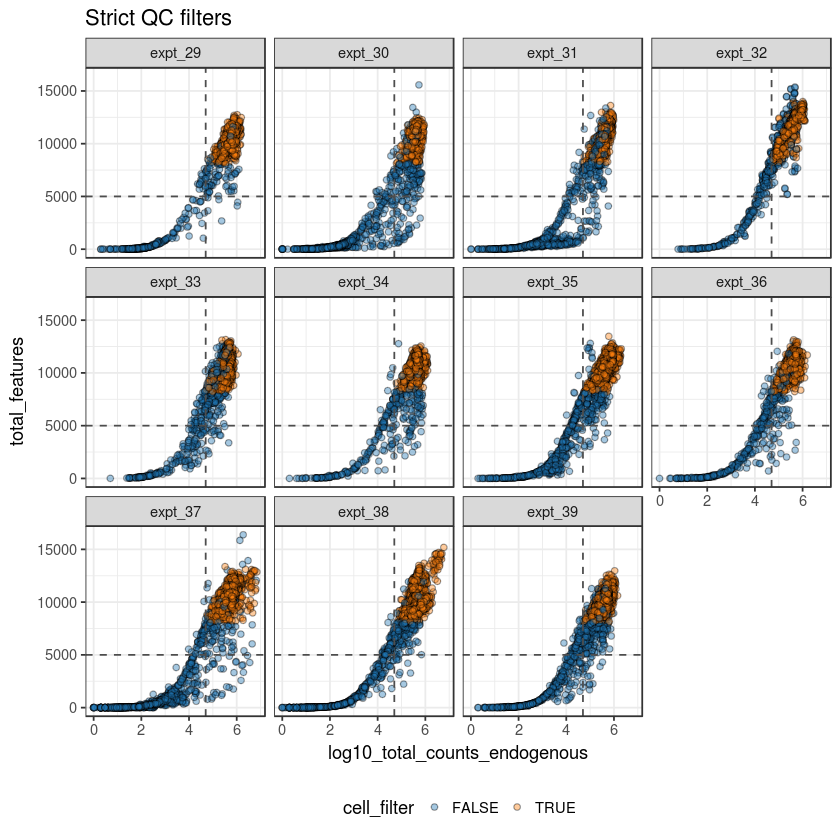

In [44]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  cell_filter)) +
     geom_point(shape = 21, alpha= 0.4) +
     scale_fill_tableau() +
     facet_wrap(~experiment, ncol = 4) + ggtitle("Strict QC filters") +
    geom_hline(yintercept = 5000, linetype = 2, colour = "gray30") +
    geom_vline(xintercept = log10(50000), linetype = 2, colour = "gray30") +
     theme_bw() + theme(legend.position = "bottom")


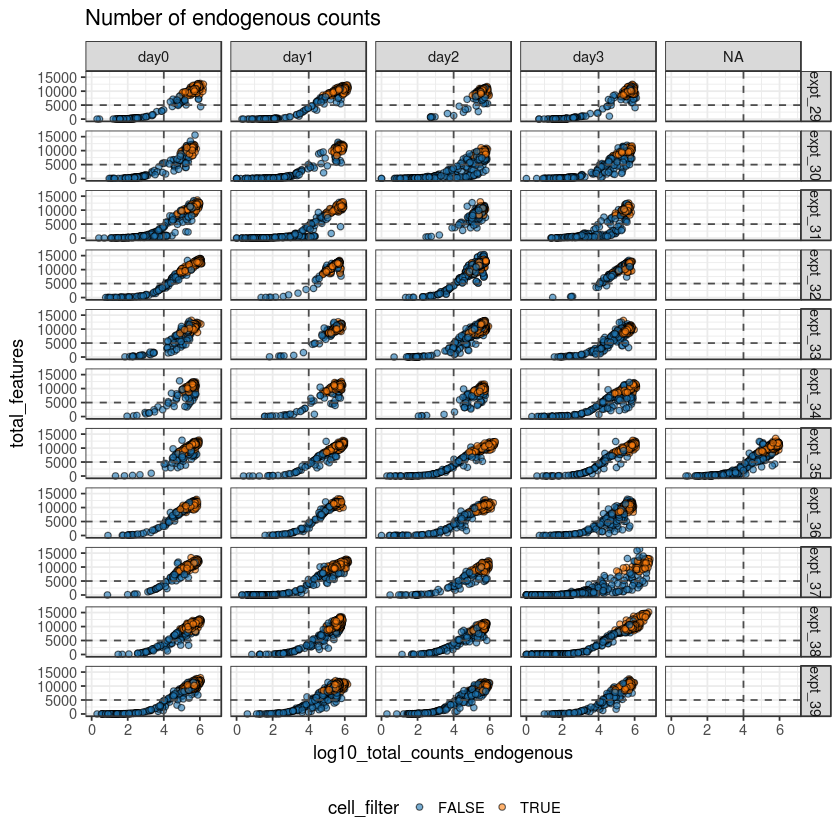

In [45]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  cell_filter)) +
    geom_point(shape = 21, alpha= 0.6) +
    scale_fill_tableau() +
    facet_grid(experiment ~ day) + ggtitle("Number of endogenous counts") +
    geom_hline(yintercept = 5000, linetype = 2, colour = "gray30") +
    geom_vline(xintercept = 4, linetype = 2, colour = "gray30") +
    theme_bw() + theme(legend.position = "bottom")


In [52]:
sce_filt <- sce[, sce$cell_filter]
dim(sce_filt)

[1] 25127 14706

In [55]:
#mem_used()

In [56]:
#object_size(sce_filt)


After this filtering we retain **10,639** cells for downstream analysis.




In [50]:
sce = sce[,!(is.na(sce$day))]

In [53]:
fall <- as.data.frame(table(sce$day, sce$experiment))$Freq
ffilt <- as.data.frame(table(sce_filt$day, sce_filt$experiment))$Freq
matrix(100 * ffilt / fall, nrow = length(unique(sce_filt$day)),
       dimnames = list(sort(unique(sce_filt$day)), sort(unique(sce_filt$experiment)))) %>%  kable



|     |  expt_29|  expt_30|  expt_31|  expt_32|  expt_33|  expt_34|  expt_35|  expt_36|   expt_37|  expt_38|  expt_39|
|:----|--------:|--------:|--------:|--------:|--------:|--------:|--------:|--------:|---------:|--------:|--------:|
|day0 | 66.23037| 42.70833| 44.01042| 67.96875| 83.46354| 88.28125| 87.50000| 76.04167| 83.854167| 87.10938| 79.00913|
|day1 | 65.70681| 41.00529| 39.94778| 85.93750| 89.58333| 88.28125| 80.72917| 77.86458| 71.559633| 83.70274| 78.21181|
|day2 | 90.36458| 13.80208| 58.85417| 28.12500| 61.45833| 84.37500| 62.40209| 64.22977| 74.218750| 79.03646| 58.72396|
|day3 | 66.84073| 38.54167| 31.77083| 39.32292| 80.33854| 54.71204| 69.01042| 70.44271|  9.605263| 41.85714| 63.28125|


Table showing number of cells with "unknown" donor:



In [54]:
table(sce$donor == "unknown", sce$experiment) %>% kable



|      | expt_29| expt_30| expt_31| expt_32| expt_33| expt_34| expt_35| expt_36| expt_37| expt_38| expt_39|
|:-----|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|FALSE |    1248|     828|    1080|    1788|    2578|    1449|    1428|    1783|    1471|    2561|    2777|
|TRUE  |     283|     702|     455|     132|     110|      85|     107|     136|     820|     442|     294|


Table showing number of cells with more than 50,000 endogenous counts,
by experiment:



In [55]:
table(sce$total_counts_endogenous > 50000, sce$experiment) %>% kable



|      | expt_29| expt_30| expt_31| expt_32| expt_33| expt_34| expt_35| expt_36| expt_37| expt_38| expt_39|
|:-----|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|-------:|
|FALSE |     329|     816|     570|     236|     220|     176|     274|     297|     922|     578|     482|
|TRUE  |    1202|     714|     965|    1684|    2468|    1358|    1261|    1622|    1369|    2425|    2589|




Overall QC pass rate for cells:



In [56]:
100 * ncol(sce_filt) / ncol(sce)

[1] 65.19484


We are able to retain a little over 11000 cells for downstream analysis.

# Check donors

## After QC



In [57]:
tb <- table(sce_filt$donor, sce_filt$day)


There are `r length(unique(sce$donor[sce$cell_filter]))` donors that
have at least one QC-passing cell.

`r sum(table(sce$donor[sce$cell_filter]) >= 15)` donors have at least
15 QC-passing cells aggregated across all days.

`r nrow(tb[rowSums(tb) < 100,])` donors with at least 100 QC-passing
cells aggregated across all days.

All donors used:



In [58]:
length(unique(sce$donor[sce$cell_filter]))
sum(table(sce$donor[sce$cell_filter]) >= 15)
#unique(sce_filt$donor)

[1] 55

[1] 55

In [59]:
rownames(tb)[tb[, "day0"] >= 15]
rownames(tb)[tb[, "day1"] >= 15]
rownames(tb)[tb[, "day2"] >= 15]
rownames(tb)[tb[, "day3"] >= 15]

[1] "aowh" "bokz" "cicb" "cuhk" "datg" "eiwy" "feec" "fejf" "guss" "hegp"
[11] "heth" "iezw" "iisa" "joxm" "kajh" "keui" "kolf" "kucg" "lepk" "lise"
[21] "meue" "mita" "naah" "naju" "nocf" "nudd" "nufh" "oibg" "oicx" "paab"
[31] "poih" "puie" "qaqx" "qoog" "qorq" "rayr" "sehl" "seru" "sojd" "tolg"
[41] "ueah" "uenn" "vass" "veku" "vils" "wahn" "wegi" "wibj" "wigw" "wuye"
[51] "yemz" "zagm" "zerv"

[1] "aowh" "bokz" "cicb" "cuhk" "datg" "eiwy" "feec" "fejf" "guss" "heth"
[11] "iezw" "iisa" "joxm" "kajh" "kolf" "kucg" "lepk" "lise" "meue" "mita"
[21] "naah" "naju" "nocf" "nudd" "nufh" "oibg" "oicx" "paab" "poih" "puie"
[31] "qaqx" "qoog" "qorq" "rayr" "sehl" "seru" "sojd" "tolg" "ueah" "uenn"
[41] "vass" "veku" "vils" "wahn" "wegi" "wibj" "wigw" "wuye" "yemz" "zagm"
[51] "zerv"

[1] "aowh" "bokz" "cicb" "cuhk" "datg" "feec" "fejf" "guss" "hegp" "iezw"
[11] "iisa" "joxm" "kajh" "keui" "kolf" "kucg" "lepk" "lise" "meue" "mita"
[21] "naah" "naju" "nocf" "nudd" "nufh" "oibg" "oicx" "paab" "poih" "puie"
[31] "qaqx" "qoog" "qorq" "rayr" "sehl" "seru" "sojd" "tolg" "ueah" "vass"
[41] "veku" "vils" "wahn" "wegi" "wigw" "wuye" "yemz" "zagm" "zerv"

[1] "aowh" "bokz" "cicb" "cuhk" "datg" "eiwy" "feec" "guss" "hegp" "iezw"
[11] "joxm" "kajh" "keui" "lise" "meue" "mita" "naah" "naju" "nocf" "nudd"
[21] "nufh" "oibg" "oicx" "paab" "poih" "puie" "qaqx" "qoog" "qorq" "rayr"
[31] "sehl" "seru" "sojd" "tolg" "ueah" "vass" "vils" "wahn" "wigw" "wuye"
[41] "zagm"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


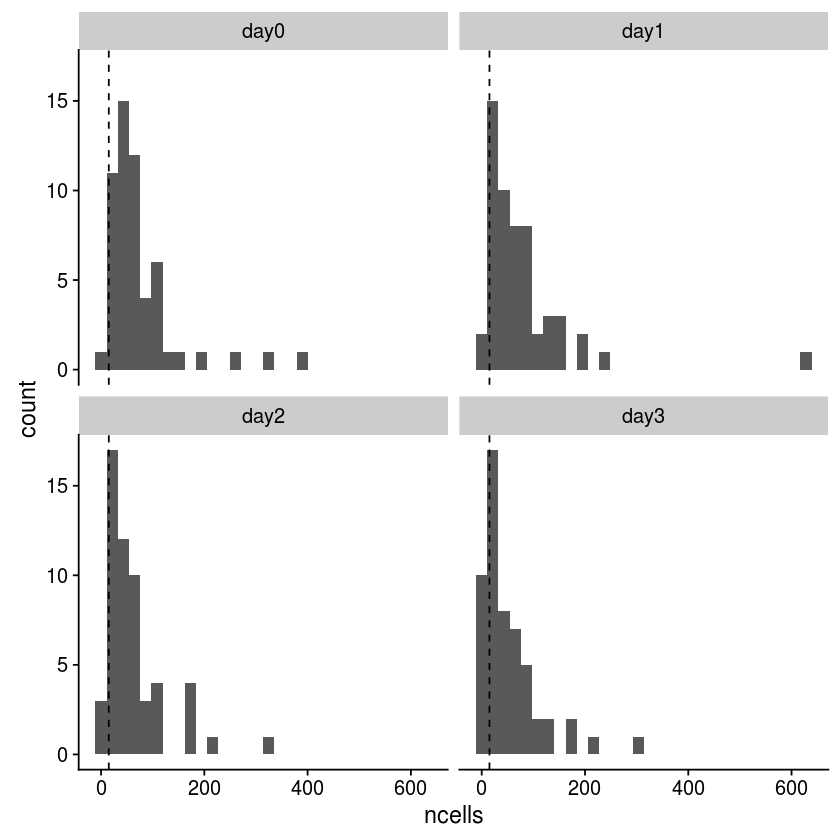

In [60]:
df_ncells <- as_data_frame(table(sce_filt$donor, sce_filt$day))
colnames(df_ncells) <- c("donor", "day", "ncells")
ggplot(df_ncells, aes(x = ncells)) +
    geom_histogram() +
    facet_wrap(~day) +
    geom_vline(xintercept = 15, linetype = 2)


There are `r colSums(tb >= 15)[1]` donors with at least 15 QC-passing day 0 cells.

There are `r colSums(tb >= 15)[2]` donors with at least 15 QC-passing Day 1 cells.

There are `r colSums(tb >= 15)[3]` donors with at least 15 QC-passing Day 2 cells.

There are `r colSums(tb >= 15)[4]` donors with at least 15 QC-passing Day 3 cells .

### Number of cells from each experiment and day that pass the QC



In [62]:
table(sce_filt$donor[sce_filt$experiment == "expt_29"], sce_filt$day[sce_filt$experiment == "expt_29"])
table(sce_filt$donor[sce_filt$experiment == "expt_30"], sce_filt$day[sce_filt$experiment == "expt_30"])
table(sce_filt$donor[sce_filt$experiment == "expt_31"], sce_filt$day[sce_filt$experiment == "expt_31"])
table(sce_filt$donor[sce_filt$experiment == "expt_32"], sce_filt$day[sce_filt$experiment == "expt_32"])
table(sce_filt$donor[sce_filt$experiment == "expt_33"], sce_filt$day[sce_filt$experiment == "expt_33"])
table(sce_filt$donor[sce_filt$experiment == "expt_34"], sce_filt$day[sce_filt$experiment == "expt_34"])
table(sce_filt$donor[sce_filt$experiment == "expt_35"], sce_filt$day[sce_filt$experiment == "expt_35"])
table(sce_filt$donor[sce_filt$experiment == "expt_36"], sce_filt$day[sce_filt$experiment == "expt_36"])
table(sce_filt$donor[sce_filt$experiment == "expt_37"], sce_filt$day[sce_filt$experiment == "expt_37"])
table(sce_filt$donor[sce_filt$experiment == "expt_38"], sce_filt$day[sce_filt$experiment == "expt_38"])
table(sce_filt$donor[sce_filt$experiment == "expt_39"], sce_filt$day[sce_filt$experiment == "expt_39"])

      
       day0 day1 day2 day3
  aowh   42   46   46   39
  keui   23   10   24   21
  meue   74   77   35   47
  naah   33   31   32   60
  poih   62   60  180   65
  vils   19   27   30   24

      
       day0 day1 day2 day3
  aowh   15    9    5    9
  oicx   34   42   17   48
  sehl   41   48   12   57
  suop   10    4    1    3
  wahn   41   33    7   20
  wibj   23   19   11   11

      
       day0 day1 day2 day3
  cicb   42   21   75   26
  cuhk   43   47   39   27
  hegp   22   13   25   16
  lepk   16   25   28    5
  ueah   24   30   43   38
  veku   22   17   16   10

      
       day0 day1 day2 day3
  guss   87   99   60   42
  lepk   20    4   10    0
  mita   35   58   24   21
  nocf   12   19   15    5
  oibg  107  150  107   83

      
       day0 day1 day2 day3
  datg   71   49   56   64
  feec   75   62   65  108
  guss  116   58   66  129
  nudd  108   43  111  132
  paab  119   47   70   57
  qorq  152   85  104  127

      
       day0 day1 day2 day3
  bokz   83  109   85   47
  datg   51   37   41   25
  guss   51   35   40   36
  nudd   88   78   65   32
  sehl   66   80   93   69

      
       day0 day1 day2 day3
  fejf   33   18   17   11
  nocf   71   78   52   73
  nufh   64   38   33   31
  wahn   50   61   38   39
  wigw   56   69   56   71
  zagm   62   46   43   40

      
       day0 day1 day2 day3
  eiwy   25   18   10   25
  kajh   52   43   47   57
  lise   65   61   39   77
  naju   25   29   23   57
  puie  102  126  106  293
  qoog   23   22   21   32

      
       day0 day1 day2 day3
  iezw   33   85   49   25
  kolf   74  104   66    6
  seru   51   84   56   21
  uenn   34   48   14    5
  wegi   37   65   32   12
  zerv   93  160   68    4

      
       day0 day1 day2 day3
  qaqx  101  197  175  106
  rayr   33   47   35   27
  sojd  321  241  218   42
  tolg  104   42   58   28
  vass   75   83   89   76
  yemz   35   32   32   14

      
       day0 day1 day2 day3
  bezi   13   12    4    3
  heth   30   24   11    3
  iisa   38   55   18    9
  joxm  384  629  317  175
  kucg   72   40   29    2
  wuye   69  141   72   51


Happily, all of the lines that we have sequenced (including monogenic diabetes lines) have genotype data available for our use.



In [63]:
cram2donor <- data.frame(cram_id = sce$sample_id, line_id = sce$donor)
## head(cram2donor)
write_tsv(cram2donor, path = "../../data_processed/merged/20180227/29to39_cram2donor.tsv")


All expression values were quantified using Salmon v0.8.2.

# Filter lowly-expressed genes

We keep genes with at least one count on average across all cells. We also drop feature control genes (ERCCs and MT genes).



In [64]:
saveRDS(sce, "../../data_processed/merged/20180227/sce_merged_29to39_full_with_qc_labels.rds")


In [65]:
# cpm(sce_filt) <- scater::calculateCPM(sce_filt)
keep_gene <- (rowMeans(counts(sce_filt)) > 1)
keep_gene <- ((keep_gene | rownames(sce_filt) %in% diff_genes))
table(keep_gene)
sce_filt <- sce_filt[keep_gene,]
sce_filt
object_size(sce_filt)

keep_gene
FALSE  TRUE 
13165 11962 

class: SingleCellExperiment 
dim: 11962 14706 
metadata(0):
assays(2): tpm counts
rownames(11962): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ENSG00000272398_CD24 ENSG00000273439_ZNF8
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(14706): 22607_5#10 22607_5#100 ... 25262_8#98 25262_8#99
colData names(122): salmon_version samp_type ... control_type
  cell_filter
reducedDimNames(0):
spikeNames(0):

2.85 GB


This filtering reduces the number of genes from ~20,000 to just ~10,000.

Now compute logcounts values for the object and save.



In [66]:
logcounts(sce_filt) <- log2(
    calculateCPM(sce_filt, use.size.factors = FALSE) + 1)
# saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_29to39_filt.rds")


# Normalization with *scran* size factors

We can compute the "sum factors" with *scran* and look at their distributions across experiments and days, especially in relation to the number of counts from endogenous features.



In [67]:
source("https://bioconductor.org/biocLite.R")
biocLite("scran")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) ‘scran’
Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘scran’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'ape', 'bindrcpp', 'bit', 'broom', 'callr', 'caret', 'cluster',
  'CVST', 'data.table', 'DBI', 'ddalpha', 'devtools', 'dplyr', 'dtw',
  'foreign', 'Formula', 'fpc', 'futile.options', 'GGally', 'ggjoy', 'ggridges',
  'ggthemes', 'git2r', 'glmnet', 'htmlTable', 'htmlwidgets', 'httpuv', 'ica',
  'IRdisplay', 'irlba', 'kernlab', 'lambda.r', 'lubridate', 'maps', 'MASS',
  'Matrix', 'modelr', 'mvtnorm', 'nlme', 'NMF', 'pbapply', 'pbdZMQ', 'pillar',
  '

In [68]:
library(scran)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


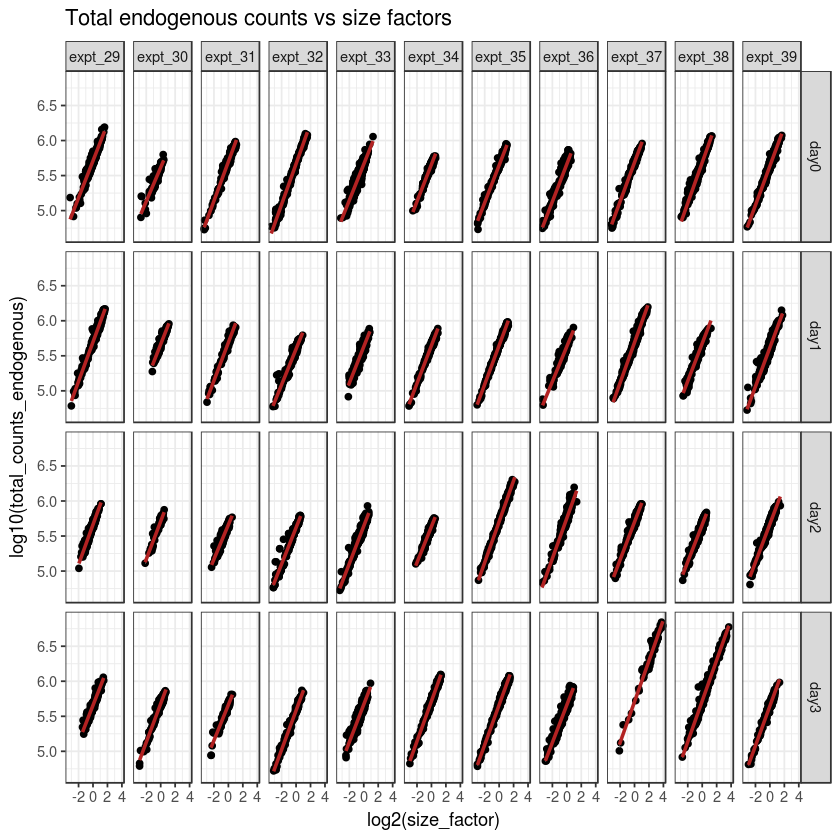

Picking joint bandwidth of 0.193


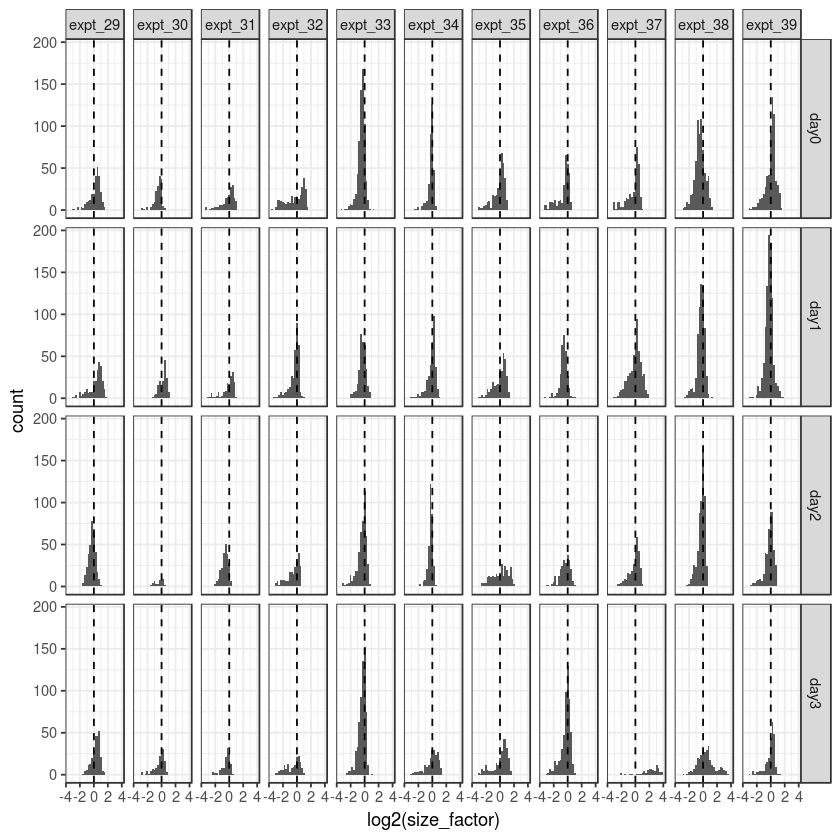

         
          FALSE
  expt_29  1107
  expt_30   520
  expt_31   670
  expt_32   958
  expt_33  2074
  expt_34  1211
  expt_35  1150
  expt_36  1378
  expt_37  1226
  expt_38  2211
  expt_39  2201

         
          FALSE
  expt_29  1107
  expt_30   520
  expt_31   670
  expt_32   958
  expt_33  2074
  expt_34  1211
  expt_35  1150
  expt_36  1378
  expt_37  1226
  expt_38  2211
  expt_39  2201

[1] 0

[1] 0

[1] 81

[1] 0.005507956

[1] 215

[1] 0.01461988

[1] 601

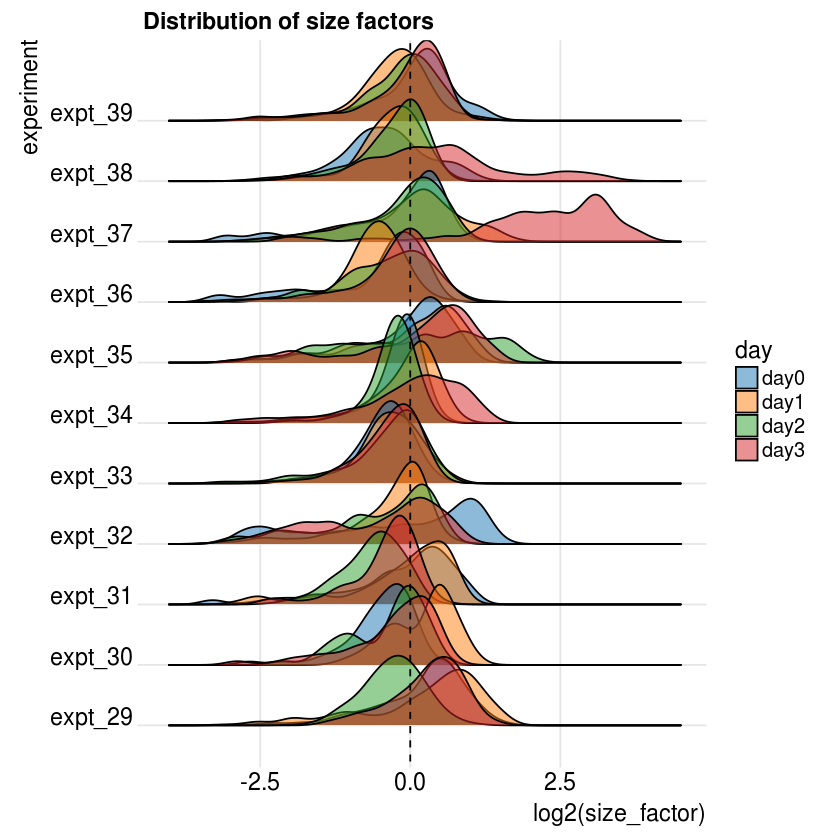

In [69]:
#sce_filt <- readRDS(file = "../../data_processed/merged/sce_merged_qc_filt.rds")
isSpike(sce_filt, "ERCC") <- grepl("^ERCC-", rownames(sce_filt))
clusters <- scran::quickCluster(sce_filt, min.size = 400, method = "igraph",
                         subset.row = sample(nrow(sce_filt), size = 3000))
sce_filt <- computeSumFactors(sce_filt, cluster = clusters)
#sce_filt <- computeSpikeFactors(sce_filt, general.use = FALSE)

sce_filt$size_factor <- sizeFactors(sce_filt)

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor), y = log10(total_counts_endogenous))) +
    geom_point() + geom_smooth(method = "lm", colour = "firebrick") +
    facet_grid(day ~ experiment) + theme_bw() +
    ggtitle("Total endogenous counts vs size factors")

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor))) +
    geom_histogram() + geom_vline(xintercept = 0, linetype = 2) +
    facet_grid(day ~ experiment) + theme_bw()

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor), y = experiment, fill = day)) +
    geom_density_ridges(alpha = 0.5) + geom_vline(xintercept = 0, linetype = 2) +
    theme_ridges() + ggtitle("Distribution of size factors") +
    scale_fill_tableau()

table(sce_filt$experiment, sizeFactors(sce_filt) < 0.05)

table(sce_filt$experiment, sizeFactors(sce_filt) > 20)

sum(sizeFactors(sce_filt) > 20 | sizeFactors(sce_filt) < 0.05)

mean(sizeFactors(sce_filt) > 20 | sizeFactors(sce_filt) < 0.05)

sum(sizeFactors(sce_filt) > 8 | sizeFactors(sce_filt) < 1 / 8)
mean(sizeFactors(sce_filt) > 8 | sizeFactors(sce_filt) < 1 / 8)
sum(sizeFactors(sce_filt) > 6 | sizeFactors(sce_filt) < 1 / 6)
mean(sizeFactors(sce_filt) > 6 | sizeFactors(sce_filt) < 1 / 6)
sum(sizeFactors(sce_filt) > 4 | sizeFactors(sce_filt) < 1 / 4)


We will remove another 1.5% of cells with size factors <0.125 or greater than 8.

Very high correlation between size factors and total counts from endogenous features (both on the log scale).



In [70]:
sce_filt <- sce_filt[, (sizeFactors(sce_filt) < 8 & sizeFactors(sce_filt) > 0.125)]

In [71]:
summary(sizeFactors(sce_filt))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1253  0.6599  0.9125  0.9845  1.1851  7.9434 


These look more reasonable now, so we will go with this set of cells and size factors.



In [72]:
dim(sce_filt)

[1] 11962 14625


Now normalize the expression data using these *scran* size factors.



In [73]:
sce_filt <- normalize(sce_filt)

Warning message in .local(object, ...):
“spike-in transcripts in 'ERCC' should have their own size factors”

In [74]:
## unique(which(is.na(exprs(sce_filt)), arr.ind = TRUE)[,2])
## length(unique(which(is.na(exprs(sce_filt)), arr.ind = TRUE)[,2]))

In [75]:
prle <- plotRLE(sce_filt[!rowData(sce_filt)$is_feature_control,],
                list(exprs = "exprs"), exprs_logged = TRUE,
                colour_by = "experiment", style = "minimal")

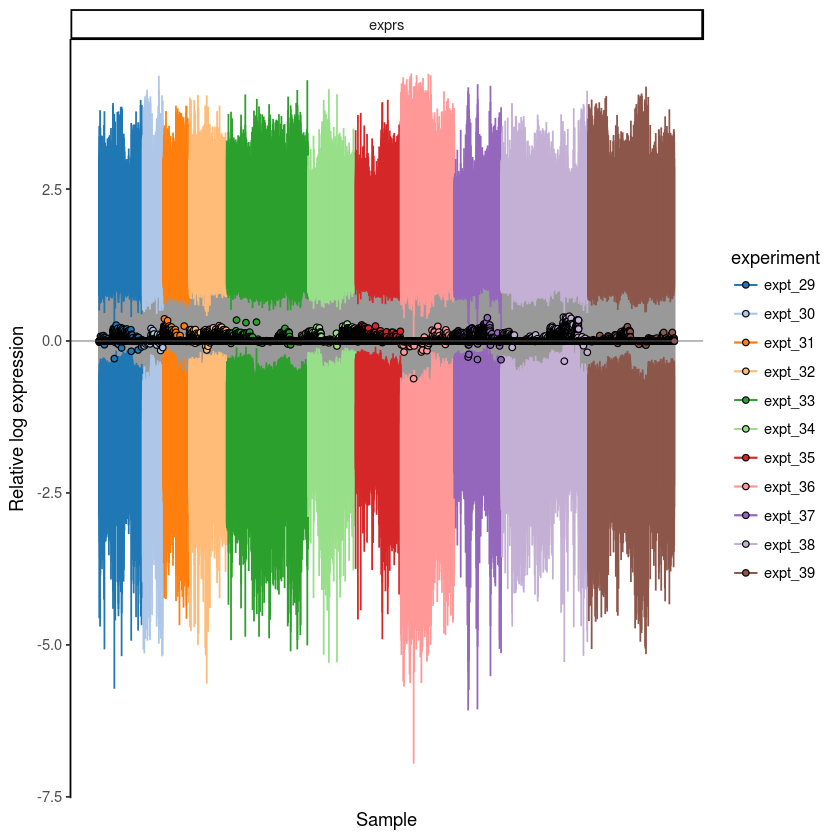

In [76]:
prle

In [ ]:
#ggsave(filename = "../../figures/rle_plot_qc_merged_no_outliers_29to39_20180227.png", plot = prle, height = 9, width = 15)


![RLE plot without outliers](../../figures/rle_plot_qc_merged_no_outliers_20180227.png)



In [77]:
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_29to39_filt.rds")


# Identify highly variable genes



`geom_smooth()` using method = 'gam'


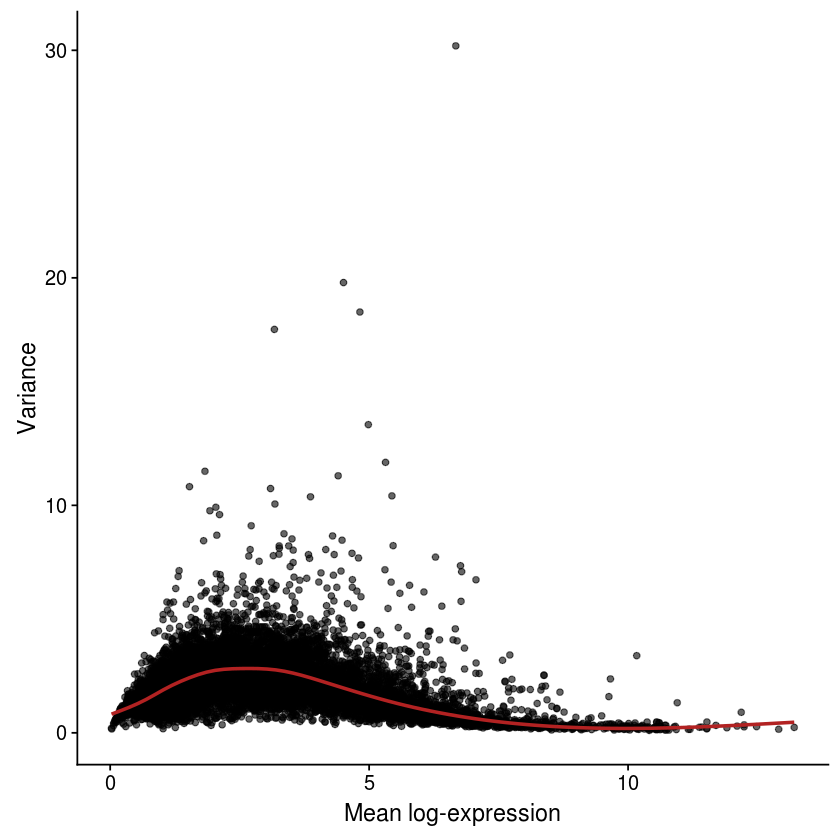

In [78]:
## sce_filt <- readRDS("../../data_processed/merged/sce_merged_qc_filt_20170829.rds")
design <- model.matrix(~experiment, data = colData(sce_filt))
alt.fit <- trendVar(sce_filt, design = design, use.spikes = FALSE)
alt.decomp <- decomposeVar(sce_filt, alt.fit)

data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech) %>%
    ggplot(aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")


In [79]:
top.hvgs <- order(alt.decomp$bio, decreasing = TRUE)
head(alt.decomp[top.hvgs,])
dim(alt.decomp)
sum(alt.decomp$FDR < 0.05, na.rm = TRUE)
sum(alt.decomp$FDR < 0.01, na.rm = TRUE)
sum(alt.decomp$bio >= 0.1 * alt.decomp$tech)
hvgs <- rownames(alt.decomp[alt.decomp$FDR < 0.01,])
length(hvgs)
diff_genes[diff_genes %in% hvgs]

mean     total    bio      tech     p.value FDR
ENSG00000147869_CER1    6.672881 30.19522 29.44770 0.747513 0       0  
ENSG00000158815_FGF17   4.505228 19.79113 17.80811 1.983014 0       0  
ENSG00000095596_CYP26A1 4.821438 18.49647 16.75062 1.745852 0       0  
ENSG00000104371_DKK4    3.170919 17.73242 14.97872 2.753702 0       0  
ENSG00000185155_MIXL1   4.984825 13.54661 11.92143 1.625179 0       0  
ENSG00000149591_TAGLN   5.317167 11.88891 10.49028 1.398628 0       0

[1] 11962     6

[1] 4694

[1] 4592

[1] 3725

[1] 4592

[1] "ENSG00000111704_NANOG"  "ENSG00000204531_POU5F1" "ENSG00000164362_TERT"  
 [4] "ENSG00000181449_SOX2"   "ENSG00000121570_DPPA4"  "ENSG00000164458_T"     
 [7] "ENSG00000163508_EOMES"  "ENSG00000185155_MIXL1"  "ENSG00000121966_CXCR4" 
[10] "ENSG00000136574_GATA4"  "ENSG00000141448_GATA6"  "ENSG00000164736_SOX17" 
[13] "ENSG00000133937_GSC"    "ENSG00000147869_CER1"   "ENSG00000132130_LHX1"  
[16] "ENSG00000152804_HHEX"

`geom_smooth()` using method = 'gam'


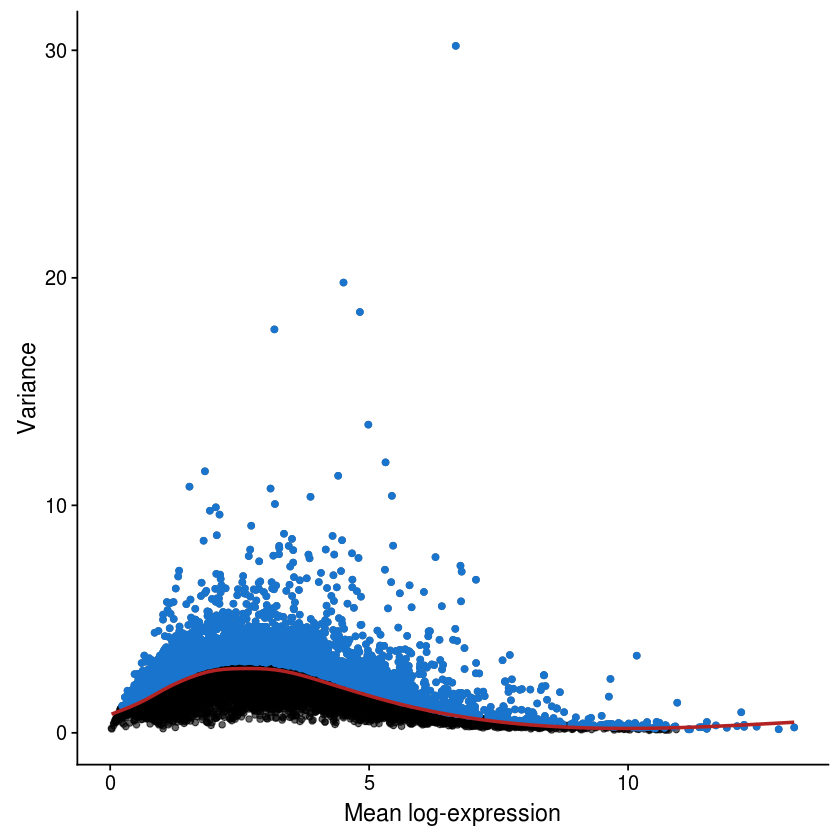

In [80]:
vardecomp <-  data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech, bio = alt.decomp$bio)
ggplot(vardecomp, aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_point(aes(x = mean, y = total), colour = "dodgerblue3",
               data = dplyr::filter(vardecomp, bio >= 0.1 * tech)) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")

In [81]:
null.dist <- correlateNull(design = design) # fewer iterations can to speed it up.
# cor.genes <- correlatePairs(sce_filt[top.hvgs,], null.dist=null.dist, per.gene=TRUE)
# head(cor.genes)
cor.pairs <- correlatePairs(sce_filt[hvgs,], null.dist=null.dist, design=design)
head(cor.pairs)
g1 <- cor.pairs$gene1[cor.pairs$FDR < 0.05]
g2 <- cor.pairs$gene2[cor.pairs$FDR < 0.05]
high_cor_genes <- unique(c(g1, g2))

gene1                    gene2                     rho       p.value     
1 ENSG00000230903_RPL9P8   ENSG00000237550_UBE2Q2P6  0.9999394 1.999998e-06
2 ENSG00000094755_GABRP    ENSG00000164265_SCGB3A2   0.9237852 1.999998e-06
3 ENSG00000255823_MTRNR2L8 ENSG00000269028_MTRNR2L12 0.9170468 1.999998e-06
4 ENSG00000094755_GABRP    ENSG00000131969_ABHD12B   0.8480145 1.999998e-06
5 ENSG00000094755_GABRP    ENSG00000104327_CALB1     0.8406501 1.999998e-06
6 ENSG00000134057_CCNB1    ENSG00000166851_PLK1      0.8380778 1.999998e-06
  FDR          limited
1 5.197814e-06 TRUE   
2 5.197814e-06 TRUE   
3 5.197814e-06 TRUE   
4 5.197814e-06 TRUE   
5 5.197814e-06 TRUE   
6 5.197814e-06 TRUE


Filter down to an object just containing the
`r length(intersect(high_cor_genes, hvgs))` highly-variable genes.



In [82]:
hvgs <- intersect(high_cor_genes, hvgs)
sce_hvg <- sce_filt[rownames(sce_filt) %in% c(hvgs, diff_genes),]

In [83]:
saveRDS(object = sce_hvg, file = "../../data_processed/merged/20180227/sce_merged_qc_29to39_hvg.rds")

rowData(sce_filt)$is_hvg <- rownames(sce_filt) %in% hvgs
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_29to39_filt.rds")

sce_hvg

mem_used()

# saveRDS(exprs(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.exprs.rds")

# saveRDS(counts(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.counts.rds")

# saveRDS(colData(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.pdata.rds")

# saveRDS(rowData(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.fdata.rds")

# saveRDS(sce_hvg[, sce_hvg$day == "day0"], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day0.rds")

# saveRDS(sce_hvg[, sce_hvg$day == "day1"], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day1.rds")

# saveRDS(sce_hvg[, sce_hvg$day %in% c("day2", "day3")], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day2-3.rds")

# saveRDS(sce_filt[rownames(sce_filt) %in% c(high_cor_genes, diff_genes), sce_filt$cell_filter], "../../data_processed/merged/20180227/sce_merged_strict_qc_hvg.rds")

class: SingleCellExperiment 
dim: 4594 14625 
metadata(1): log.exprs.offset
assays(3): tpm counts logcounts
rownames(4594): ENSG00000001617_SEMA3F ENSG00000001626_CFTR ...
  ENSG00000271043_MTRNR2L2 ENSG00000272398_CD24
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(14625): 22607_5#10 22607_5#100 ... 25262_8#98 25262_8#99
colData names(123): salmon_version samp_type ... cell_filter
  size_factor
reducedDimNames(0):
spikeNames(1): ERCC

17.3 GB


Save datasets for QTL analysis (keeping donors with >=15 cells passing QC).



In [ ]:
# tb <- table(sce_hvg$donor, sce_hvg$day)
# donors_day0 <- rownames(tb)[tb[, "day0"] >= 15]
# write_tsv(data_frame(donor = sort(rownames(tb)[tb[, "day0"] >= 15])),
#           path = "../../qtls/day0_donors_20180227.tsv",
#           col_names = FALSE)
# donors_day1 <- rownames(tb)[tb[, "day1"] >= 15]
# donors_day2 <- rownames(tb)[tb[, "day2"] >= 15]
# donors_day3 <- rownames(tb)[tb[, "day3"] >= 15]
# donors_alldays <- rownames(tb)[rowSums(tb) >= 50]

# saveRDS(sce_hvg[, (sce_hvg$day == "day0" & sce_hvg$donor %in% donors_day0)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day0_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day1" & sce_hvg$donor %in% donors_day1)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day1_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day2" & sce_hvg$donor %in% donors_day2)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day2_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day3" & sce_hvg$donor %in% donors_day3)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day3_for_qtl.rds")


# saveRDS(sce_hvg[, (sce_hvg$donor %in% donors_alldays)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_alldays_for_qtl.rds")





# Visualize filtered dataset

We take a look at the normalized, filtered dataset using some common dimension reduction techniques (PCA, diffusion maps, t-SNE).

## RLE plot



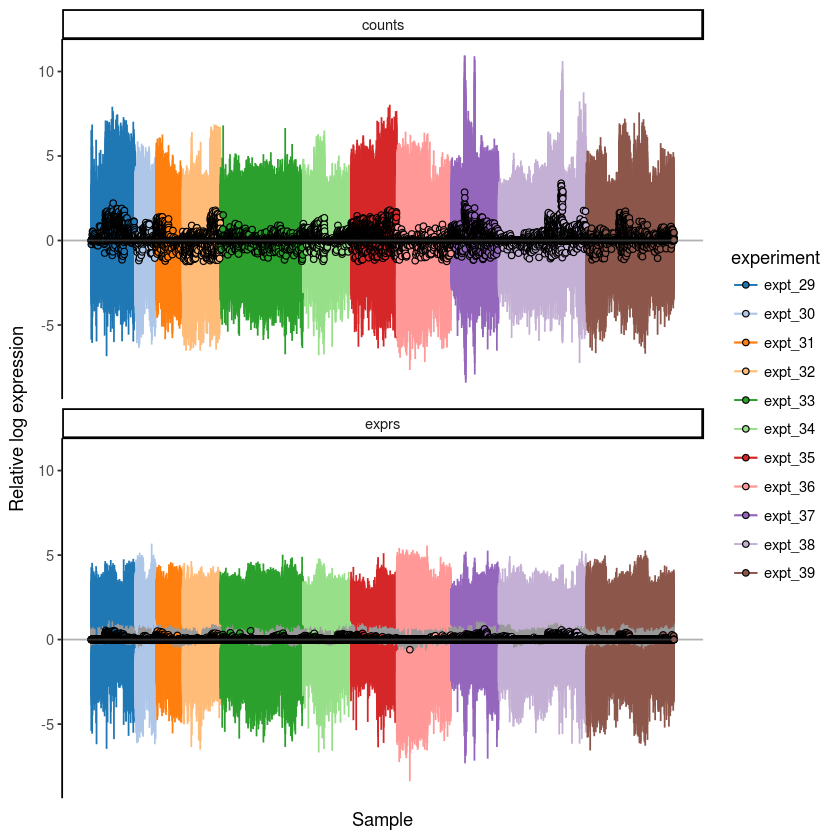

In [84]:
prle <- plotRLE(sce_hvg, list(counts = "counts", exprs = "exprs"),
                exprs_logged = c(FALSE, TRUE),
                colour_by = "experiment", style = "minimal")
prle


## PCA plots

We can show overall structure amongst QC cells with simple PCA plots.



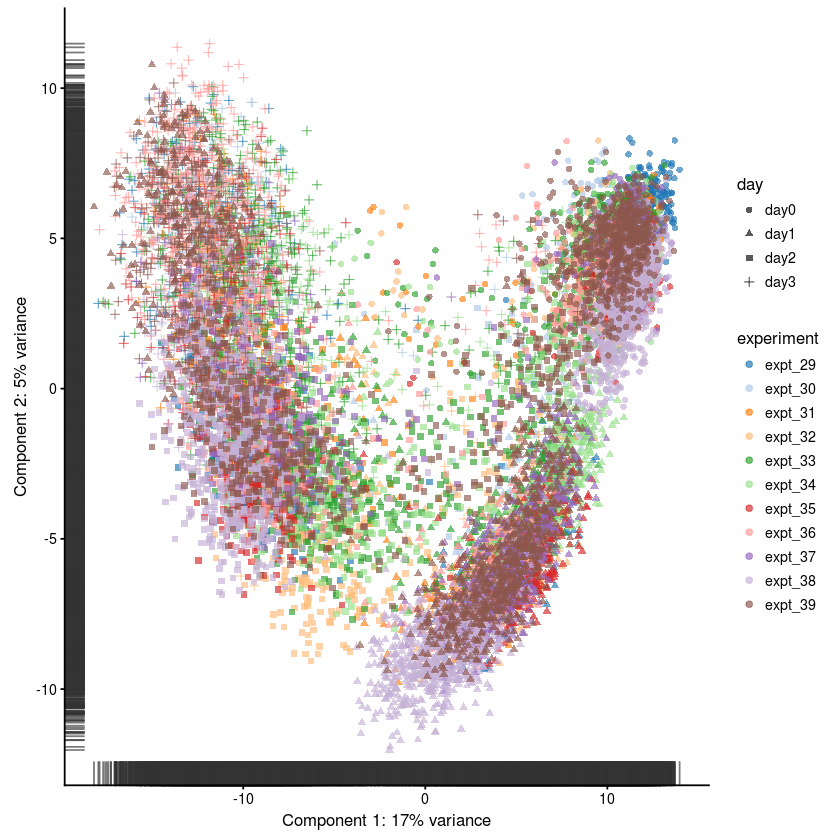

In [85]:
sce_hvg <- plotPCA(sce_hvg, colour_by = "experiment", shape_by = "day",
                   return_SCE = TRUE, ncomponents = 2, draw_plot = TRUE)

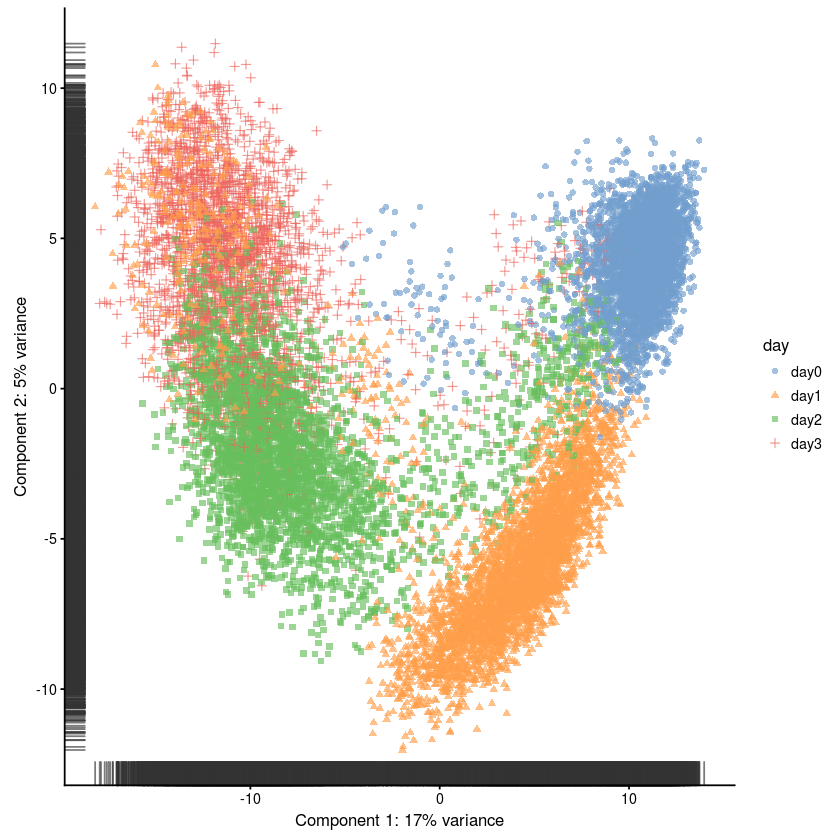

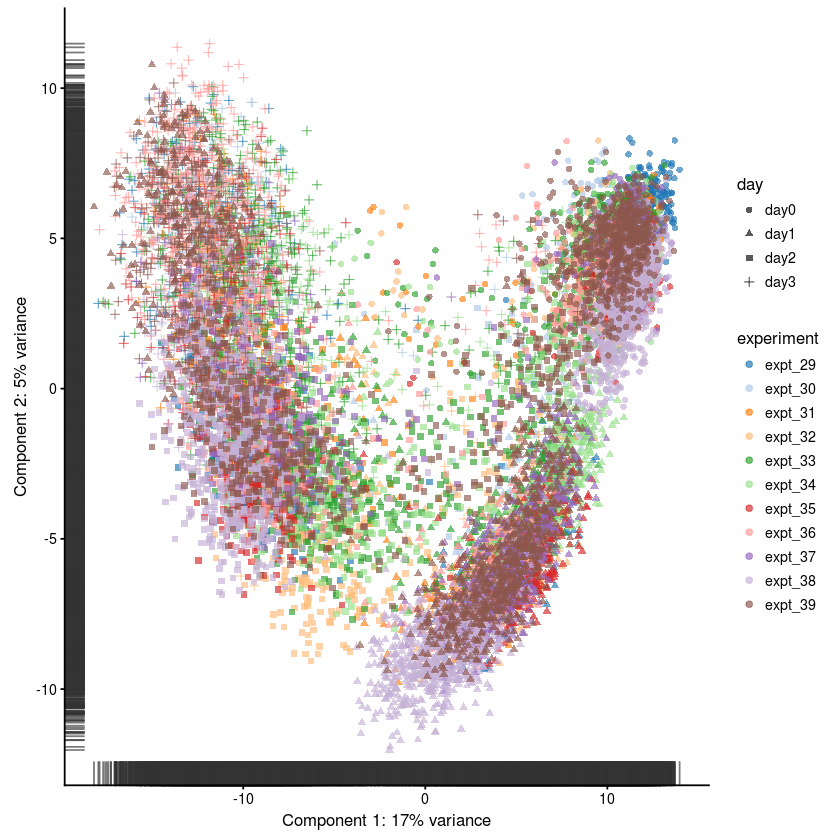

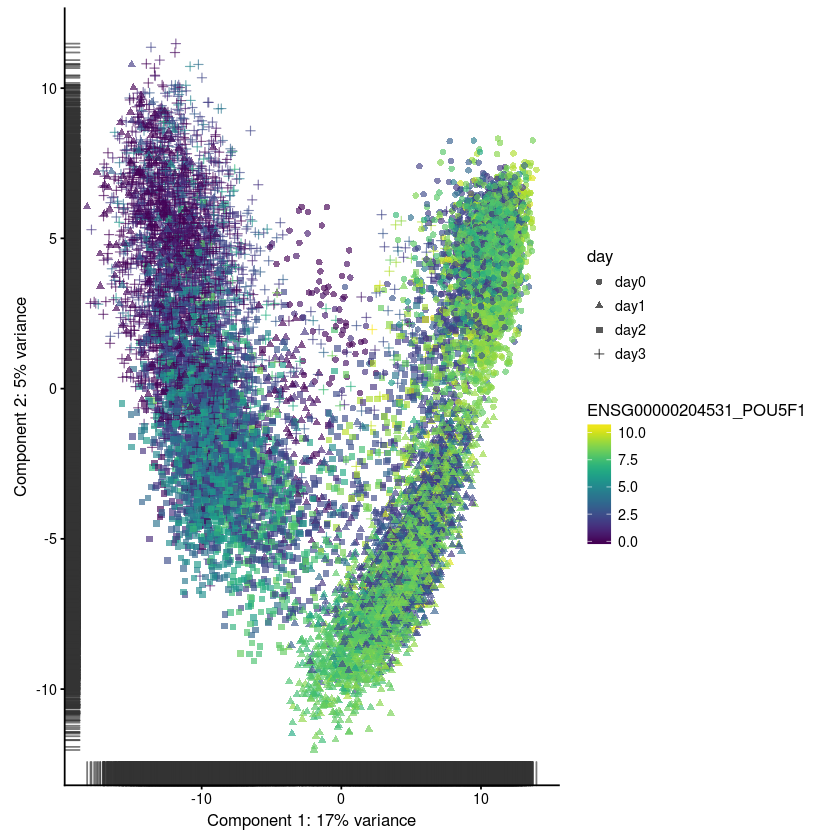

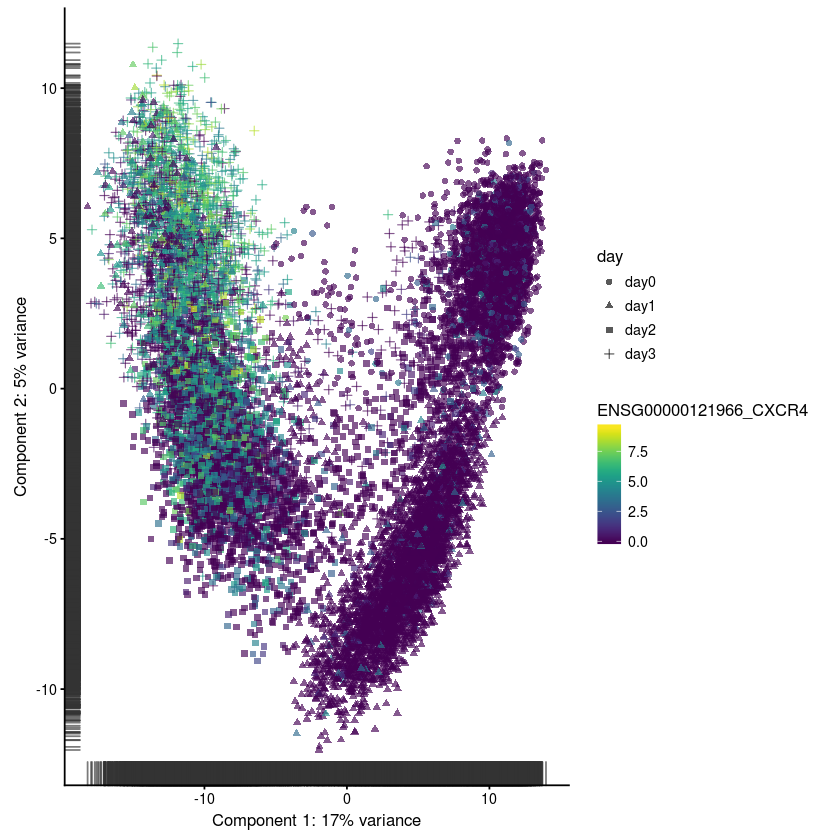

In [86]:

plotReducedDim(sce_hvg, use_dimred = "PCA", colour_by = "day", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA", colour_by = "experiment", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA",
               colour_by = "ENSG00000204531_POU5F1", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA",
               colour_by = "ENSG00000121966_CXCR4", shape_by = "day")






# Session Info



In [ ]:
sessionInfo()